In [496]:
from astropy.io import ascii, fits
import astropy
import pylab as plt
%matplotlib inline
from astropy import wcs
from astropy.table import Table,Column,join,hstack,vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
import pymoc
import glob
from time import sleep
import os
from astropy.nddata.utils import Cutout2D
import herschelhelp.cutouts_server as ctts
import scipy

import numpy as np
import xidplus
from xidplus import moc_routines
import pickle
import xidplus.catalogue as cat

import sys
from herschelhelp_internal.utils import inMoc,flux_to_mag
from xidplus.stan_fit import SPIRE

import aplpy
import seaborn as sns
#sns.set(color_codes=True)
import pandas as pd
#sns.set_style("white")
import xidplus.posterior_maps as postmaps
from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot, specz_merge
from herschelhelp import image_plotting,utils
import pyvo as vo
import glob

import copy

In [407]:
def get_centers(bins):
    center = (bins[:-1] + bins[1:]) / 2
    return(center)

In [2]:
def read_fits(filename):
    hdulist = fits.open(filename)
    data = hdulist[1].data
    hdulist.close()
    return(data)

In [3]:
def find_posteror_source(source_num,source_id):
    #finds the pkl file corresponding to the source you give.
    # Source_num: the row number of the source you want the pkl file for
    # Source_id: the sources id
    
    if type(source_num)==int:
        source_num = [source_num]
        source_id = [source_id]
    

    source_list = []
    for n,num in enumerate(source_num):
        file_num = int(num/10)
        #print(file_num)
        #print('data/fir_v2/xidplus_run_{}/lofar_xidplus_fir_{}_rerun.pkl.pkl'.format(file_num,file_num))
        name = file_list[file_num].replace('fits','pkl.pkl')
        #print(name)
        priors,posterior = xidplus.load(name)
        #print(source_id[n])
        if source_id[n] not in priors[0].ID:
            print('source number :{}: not in opened file. Something is wrong'.format(num))
        source_list.append([priors,posterior])
        
    return(source_list)

In [4]:
lofar_orig = Table.read('data/data_release/final_cross_match_catalogue-v0.5.fits')
mips_prior = Table.read('data/data_release/xidplus_prior_cat_MIPS.fits')
pacs_prior = Table.read('data/data_release/xidplus_prior_cat.fits')

In [5]:
lofar_orig[0]

<Row index=0 masked=True>
     Source_Name               RA                DEC                 E_RA                E_DEC               Total_flux           E_Total_flux            Peak_flux            E_Peak_flux      S_Code         Maj                   Min                  PA                 E_Maj                  E_Min                 E_PA         DC_Maj  DC_Min  DC_PA         Isl_rms         FLAG_WORKFLOW Prefilter  NoID       lr_fin            optRA              optDec      LGZ_Size LGZ_Width  LGZ_PA Assoc Assoc_Qual Art_prob Blend_prob Hostbroken_prob Imagemissing_prob Zoom_prob        Created         Position_from Renamed_from FLAG_OVERLAP_RADIO flag_clean_radio    ID    X_IMAGE  Y_IMAGE     ALPHA_J2000        DELTA_J2000    flag_clean ID_OPTICAL ID_SPITZER FLAG_OVERLAP     u_flux_corr        u_fluxerr_corr      u_mag_corr    u_magerr_corr    g_flux_corr       g_fluxerr_corr       g_mag_corr     g_magerr_corr r_flux_corr r_fluxerr_corr r_mag_corr r_magerr_corr i_flux_corr i_fluxerr_corr i_mag_corr i_magerr_corr    z_flux_corr        z_fluxerr_corr       z_mag_corr     z_magerr_corr y_flux_corr y_fluxerr_corr y_mag_corr y_magerr_corr g_hsc_flux_corr g_hsc_fluxerr_corr g_hsc_mag_corr g_hsc_magerr_corr r_hsc_flux_corr r_hsc_fluxerr_corr r_hsc_mag_corr r_hsc_magerr_corr i_hsc_flux_corr i_hsc_fluxerr_corr i_hsc_mag_corr i_hsc_magerr_corr z_hsc_flux_corr z_hsc_fluxerr_corr z_hsc_mag_corr z_hsc_magerr_corr y_hsc_flux_corr y_hsc_fluxerr_corr y_hsc_mag_corr y_hsc_magerr_corr nb921_hsc_flux_corr nb921_hsc_fluxerr_corr nb921_hsc_mag_corr nb921_hsc_magerr_corr    J_flux_corr      J_fluxerr_corr      J_mag_corr     J_magerr_corr    K_flux_corr       K_fluxerr_corr       K_mag_corr    K_magerr_corr ch1_swire_flux_corr ch1_swire_fluxerr_corr ch1_swire_mag_corr ch1_swire_magerr_corr ch2_swire_flux_corr ch2_swire_fluxerr_corr ch2_swire_mag_corr ch2_swire_magerr_corr ch3_swire_flux_corr ch3_swire_fluxerr_corr ch3_swire_mag_corr ch3_swire_magerr_corr ch4_swire_flux_corr ch4_swire_fluxerr_corr ch4_swire_mag_corr ch4_swire_magerr_corr ch1_servs_flux_corr ch1_servs_fluxerr_corr ch1_servs_mag_corr ch1_servs_magerr_corr ch2_servs_flux_corr ch2_servs_fluxerr_corr ch2_servs_mag_corr ch2_servs_magerr_corr Separation           help_id                RA_HELP           DEC_HELP          EBV     CLASS_STAR F_MIPS_24 FErr_MIPS_24_u FErr_MIPS_24_l  Bkg_MIPS_24  Sig_conf_MIPS_24 Rhat_MIPS_24 n_eff_MIPS_24 Pval_res_24 flag_mips_24 F_PACS_100 FErr_PACS_100_u FErr_PACS_100_l F_PACS_160 FErr_PACS_160_u FErr_PACS_160_l  Bkg_PACS_100  Bkg_PACS_160 Sig_conf_PACS_100 Sig_conf_PACS_160 Rhat_PACS_100 Rhat_PACS_160 n_eff_PACS_100 n_eff_PACS_160 Pval_res_100 Pval_res_160 flag_PACS_100 flag_PACS_160 F_SPIRE_250 FErr_SPIRE_250_u FErr_SPIRE_250_l F_SPIRE_350 FErr_SPIRE_350_u FErr_SPIRE_350_l F_SPIRE_500 FErr_SPIRE_500_u FErr_SPIRE_500_l Bkg_SPIRE_250 Bkg_SPIRE_350 Bkg_SPIRE_500 Sig_conf_SPIRE_250 Sig_conf_SPIRE_350 Sig_conf_SPIRE_500 Rhat_SPIRE_250 Rhat_SPIRE_350 Rhat_SPIRE_500 n_eff_SPIRE_250 n_eff_SPIRE_500 n_eff_SPIRE_350 Pval_res_250 Pval_res_350 Pval_res_500 flag_spire_250 flag_spire_350 flag_spire_500  Z_BEST Z_BEST_SOURCE  Z_SPEC z1_median  z1_min  z1_max z1_area z2_median  z2_min  z2_max z2_area nfilt_eazy nfilt_atlas nfilt_ananna chi_r_best chi_r_stellar stellar_type  AGN   optAGN  IRAGN  XrayAGN hp_idx_11 hp_depth_cluster     tot_corr_g       tot_corr_err_g   tot_corr_r tot_corr_err_r     tot_corr_z      tot_corr_err_z   zmodel chi_best Mass_median Mass_l68 Mass_u68 SFR_median SFR_l68 SFR_u68 Nfilts  u_rest  g_rest  r_rest  i_rest  z_rest  y_rest  J_rest  K_rest ch1_servs_rest ch2_servs_rest ch1_swire_rest ch2_swire_rest ch3_swire_rest ch4_swire_rest
                                                                                                                                                                                                                                                                                                                         

## Check that the output from the other sources agrees with HELP

In [590]:
file_list = glob.glob('data/fir/MIPS/*/lofar_xidplus*.pkl')
num_not = np.arange(428,860,1)

priors,posterior = xidplus.load(file_list[0])
MIPS_cat=cat.create_MIPS_cat(posterior,priors[0],0)
lofar_mips_table_all = Table.read(MIPS_cat,memmap=False)

for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)
    
    priors,posterior = xidplus.load(filename)
    MIPS_cat=cat.create_MIPS_cat(posterior,priors[0],0)
    MIPS_cat = Table.read(MIPS_cat,memmap=False)
    lofar_mips_table_all = vstack([lofar_mips_table_all,MIPS_cat])
    

data_rerun_table = lofar_mips_table_all

0
50


In [589]:
print(len(lofar_mips_table_all))
lofar_mips_table_all[0]

<Table length=7529>
       help_id                 RA         ... n_eff_MIPS_24 Pval_res_24
                            degrees       ...                          
       bytes27              float64       ...    float32      float32  
---------------------- ------------------ ... ------------- -----------
ILTJ155958.68+550534.6  239.9942929896559 ...     1720.3978         0.0
ILTJ160000.65+550723.3 240.00272394467896 ...      3413.725         0.0
ILTJ160004.97+550437.9         240.021329 ...     1297.1552         0.0
ILTJ160005.65+550103.6         240.023738 ...     2013.8982         0.0
ILTJ160005.72+544939.4         240.023858 ...     3363.8845         0.0
ILTJ160006.05+545406.7 240.02516896110987 ...     3194.5295       0.231
ILTJ160006.73+544333.5 240.02756867520733 ...     2564.8972         0.0
ILTJ160006.74+550651.5 240.02846707033066 ...     4470.4644         0.0
ILTJ160007.89+545116.3 240.03307836486294 ...     3368.4563         0.0
                   ...                ... ...           ...         ...
ILTJ160506.21+552106.9 241.27590163511485 ...     1272.9855         0.0
ILTJ160506.81+535005.8  241.2778426264927 ...     2422.8586         0.0
ILTJ160507.21+535733.2 241.28052500623807 ...      654.3667         0.0
ILTJ160507.22+540253.9 241.28016023949263 ...     3055.1636         0.0
ILTJ160507.36+555009.3  241.2805007840663 ...      594.2971         0.0
ILTJ160507.56+551938.5         241.281335 ...     1143.5317         0.0
ILTJ160507.77+542243.8 241.28238556960386 ...     3377.3564         0.0
ILTJ160508.05+542646.2 241.28324467891593 ...     3757.4578         0.0
ILTJ160508.07+534311.0  241.2839124284703 ...     1878.7037         0.0
ILTJ160508.22+545502.5 241.28398767745745 ...     2280.4604         0.0

In [33]:
#read in the HELP catalogue
masterlist = Table.read('../../../../../HELP/dmu_products/dmu32/dmu32_ELAIS-N1/data/ELAIS-N1_20171020.fits')

In [591]:
joined = join(lofar_mips_table_all,masterlist,join_type='inner',keys='help_id')

In [592]:
joined[0]

<Row index=0>
          help_id                   RA               Dec         F_MIPS_24 FErr_MIPS_24_u FErr_MIPS_24_l  Bkg_MIPS_24  Sig_conf_MIPS_24 Rhat_MIPS_24 n_eff_MIPS_24 Pval_res_24  field           ra               dec           hp_idx          ebv          redshift  zspec  f_wfc_u ferr_wfc_u f_ap_wfc_u ferr_ap_wfc_u m_wfc_u merr_wfc_u m_ap_wfc_u merr_ap_wfc_u flag_wfc_u f_megacam_u ferr_megacam_u f_ap_megacam_u ferr_ap_megacam_u m_megacam_u merr_megacam_u m_ap_megacam_u merr_ap_megacam_u flag_megacam_u f_suprime_g ferr_suprime_g f_ap_suprime_g ferr_ap_suprime_g m_suprime_g merr_suprime_g m_ap_suprime_g merr_ap_suprime_g flag_suprime_g f_megacam_g ferr_megacam_g f_ap_megacam_g ferr_ap_megacam_g m_megacam_g merr_megacam_g m_ap_megacam_g merr_ap_megacam_g flag_megacam_g f_gpc1_g ferr_gpc1_g f_ap_gpc1_g ferr_ap_gpc1_g m_gpc1_g merr_gpc1_g m_ap_gpc1_g merr_ap_gpc1_g flag_gpc1_g f_wfc_g ferr_wfc_g f_ap_wfc_g ferr_ap_wfc_g m_wfc_g merr_wfc_g m_ap_wfc_g merr_ap_wfc_g flag_wfc_g f_suprime_r ferr_suprime_r f_ap_suprime_r ferr_ap_suprime_r m_suprime_r merr_suprime_r m_ap_suprime_r merr_ap_suprime_r flag_suprime_r f_gpc1_r ferr_gpc1_r f_ap_gpc1_r ferr_ap_gpc1_r m_gpc1_r merr_gpc1_r m_ap_gpc1_r merr_ap_gpc1_r flag_gpc1_r f_wfc_r ferr_wfc_r f_ap_wfc_r ferr_ap_wfc_r m_wfc_r merr_wfc_r m_ap_wfc_r merr_ap_wfc_r flag_wfc_r f_megacam_r ferr_megacam_r f_ap_megacam_r ferr_ap_megacam_r m_megacam_r merr_megacam_r m_ap_megacam_r merr_ap_megacam_r flag_megacam_r f_gpc1_i ferr_gpc1_i f_ap_gpc1_i ferr_ap_gpc1_i m_gpc1_i merr_gpc1_i m_ap_gpc1_i merr_ap_gpc1_i flag_gpc1_i f_suprime_i ferr_suprime_i f_ap_suprime_i ferr_ap_suprime_i m_suprime_i merr_suprime_i m_ap_suprime_i merr_ap_suprime_i flag_suprime_i f_wfc_i ferr_wfc_i f_ap_wfc_i ferr_ap_wfc_i m_wfc_i merr_wfc_i m_ap_wfc_i merr_ap_wfc_i flag_wfc_i f_gpc1_z ferr_gpc1_z f_ap_gpc1_z ferr_ap_gpc1_z m_gpc1_z merr_gpc1_z m_ap_gpc1_z merr_ap_gpc1_z flag_gpc1_z f_wfc_z ferr_wfc_z f_ap_wfc_z ferr_ap_wfc_z m_wfc_z merr_wfc_z m_ap_wfc_z merr_ap_wfc_z flag_wfc_z f_megacam_z ferr_megacam_z f_ap_megacam_z ferr_ap_megacam_z m_megacam_z merr_megacam_z m_ap_megacam_z merr_ap_megacam_z flag_megacam_z f_suprime_z ferr_suprime_z f_ap_suprime_z ferr_ap_suprime_z m_suprime_z merr_suprime_z m_ap_suprime_z merr_ap_suprime_z flag_suprime_z f_suprime_n921 ferr_suprime_n921 f_ap_suprime_n921 ferr_ap_suprime_n921 m_suprime_n921 merr_suprime_n921 m_ap_suprime_n921 merr_ap_suprime_n921 flag_suprime_n921 f_gpc1_y ferr_gpc1_y f_ap_gpc1_y ferr_ap_gpc1_y m_gpc1_y merr_gpc1_y m_ap_gpc1_y merr_ap_gpc1_y flag_gpc1_y f_suprime_y ferr_suprime_y f_ap_suprime_y ferr_ap_suprime_y m_suprime_y merr_suprime_y m_ap_suprime_y merr_ap_suprime_y flag_suprime_y f_ukidss_j ferr_ukidss_j f_ap_ukidss_j ferr_ap_ukidss_j m_ukidss_j merr_ukidss_j m_ap_ukidss_j merr_ap_ukidss_j flag_ukidss_j f_ukidss_k ferr_ukidss_k f_ap_ukidss_k ferr_ap_ukidss_k m_ukidss_k merr_ukidss_k m_ap_ukidss_k merr_ap_ukidss_k flag_ukidss_k f_irac_i1 ferr_irac_i1 f_ap_irac_i1 ferr_ap_irac_i1     m_irac_i1          merr_irac_i1        m_ap_irac_i1      merr_ap_irac_i1    flag_irac_i1 f_irac_i2 ferr_irac_i2 f_ap_irac_i2 ferr_ap_irac_i2     m_irac_i2          merr_irac_i2       m_ap_irac_i2      merr_ap_irac_i2    flag_irac_i2 f_irac_i3 ferr_irac_i3 f_ap_irac_i3 ferr_ap_irac_i3 m_irac_i3 merr_irac_i3 m_ap_irac_i3 merr_ap_irac_i3 flag_irac_i3 f_irac_i4 ferr_irac_i4 f_ap_irac_i4 ferr_ap_irac_i4 m_irac_i4 merr_irac_i4 m_ap_irac_i4 merr_ap_irac_i4 flag_irac_i4 f_mips_24    ferr_mips_24    flag_mips_24 f_pacs_green ferr_pacs_green flag_pacs_green f_pacs_red ferr_pacs_red flag_pacs_red    f_spire_250       ferr_spire_250   flag_spire_250 f_spire_350   ferr_spire_350   flag_spire_350    f_spire_500      ferr_spire_500  flag_spire_500 cigale_mstar cigale_mstar_err cigale_sfr cigale_sfr_err cigale_dustlumin cigale_dustlumin_err cigale_dustlumin_ironly cigale_dustlumin_ironly_err flag_cigale flag_cigale_opt flag_cigale_ir flag_cigale_ironly stellarity stellarity_origin flag_cleaned flag

In [593]:
print('length of MIPS joined table is: {}'.format(len(joined['help_id'])))
print('number of unique sources in the MIPS rerun is: {}'.format(len(np.unique(joined['help_id']))))

length of MIPS joined table is: 26144
number of unique sources in the MIPS rerun is: 26068


In [371]:
ra1 = lofar_mips_table['RA'].data
dec1 = lofar_mips_table['Dec'].data
c_lofar = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
ra1 = joined['ra'].data
dec1 = joined['dec'].data
c_help = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
idx, d2d, _ = c_help.match_to_catalog_3d(c_lofar)

In [372]:
x = np.log10(joined['f_mips_24'])
xerr = np.log10(joined['ferr_mips_24'])
y = np.log10(joined['F_MIPS_24'])
yerr_u = np.log10(joined['FErr_MIPS_24_u']-joined['F_MIPS_24'])
yerr_l = np.log10(joined['F_MIPS_24']-joined['FErr_MIPS_24_l'])

col = d2d.value*3600

#plt.errorbar(x[::10],y[::10],xerr=xerr[::10],yerr=[yerr_u[::10],yerr_l[::10]],linestyle='')
plt.scatter(x,y,s=5,c=col)
plt.plot([0,4],[0,4],c='black')
plt.xlim(0,3)
plt.ylim(0,3)
plt.colorbar()
plt.show()

In [373]:
# how many sources are more than one sigma away from their help flux
yerr_u = joined['FErr_MIPS_24_u']-joined['F_MIPS_24']
yerr_l = joined['F_MIPS_24']-joined['FErr_MIPS_24_l']

metric = joined['f_mips_24'] - joined['F_MIPS_24']
err = joined['ferr_mips_24']**2 + ((yerr_u+yerr_l)/2)**2
np.sum(metric/err>1)

68

In [375]:
x = np.log10(joined['f_mips_24'])
y = np.log10(joined['F_MIPS_24'])

bins = np.linspace(0,3,60)
data_num,xbin,ybin = np.histogram2d(y,x,bins=bins)
data_y_avg,xbin,ybin = np.histogram2d(y,x,bins=bins,weights=col)
plt.imshow(data_y_avg/data_num)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('help mips flux')
plt.ylabel('lofar mips flux')
plt.title('flux vs flux as a function of distance from the radio source')
plt.show()

In [315]:
plot_params = {'marker':['o','+','o','v','X','d'],
              'col':['green','cyan','orange','red'],
              'size':100,
              'box_length':1/120,
              'use_redshift':[False,False,False,False]}

68
contours are at [-7.47001901e-05 -2.02801407e-05  3.41399087e-05  8.85599581e-05
  1.42980008e-04  1.97400057e-04  2.51820106e-04]
plotting 6 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


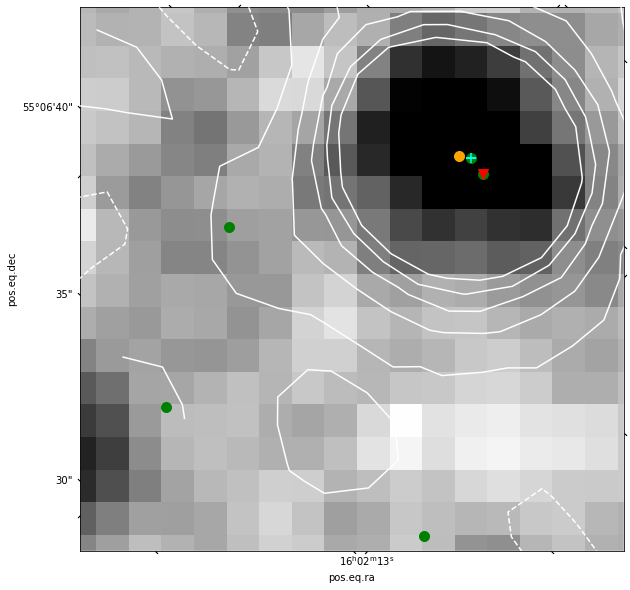

contours are at [-6.23161734e-05 -4.95999321e-06  5.23961870e-05  1.09752367e-04
  1.67108547e-04  2.24464728e-04  2.81820908e-04]
plotting 2 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


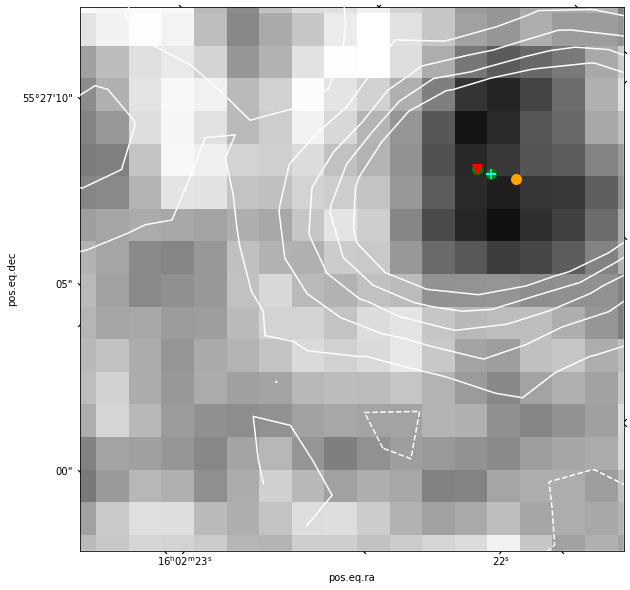

contours are at [-4.71365253e-05  2.31354427e-05  9.34074108e-05  1.63679379e-04
  2.33951347e-04  3.04223315e-04  3.74495283e-04]
plotting 2 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


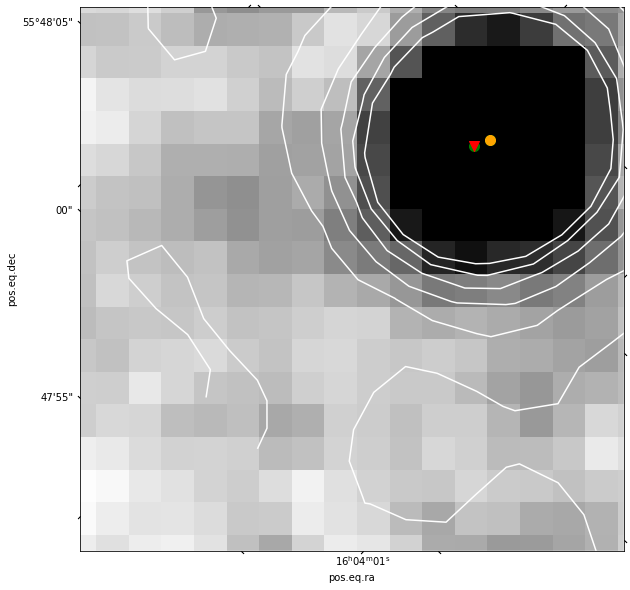

contours are at [-4.74866532e-05 -9.94318457e-06  2.76002840e-05  6.51437526e-05
  1.02687221e-04  1.40230690e-04  1.77774158e-04]
plotting 4 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


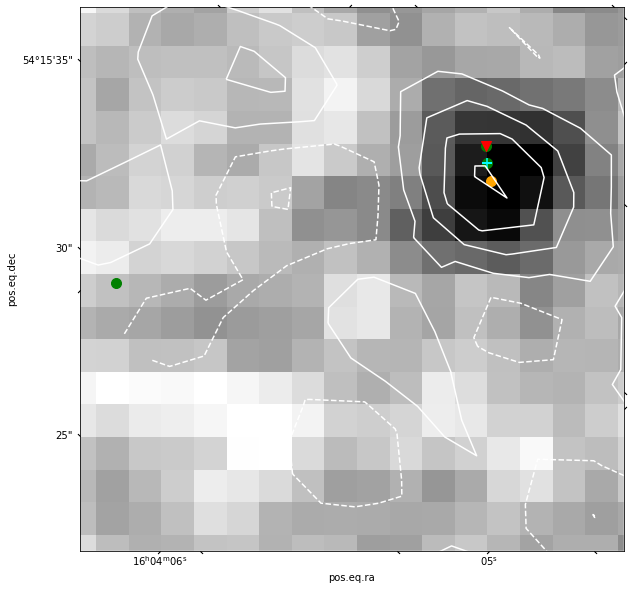

contours are at [-6.64096746e-05 -2.20500543e-05  2.23095660e-05  6.66691863e-05
  1.11028807e-04  1.55388427e-04  1.99748047e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


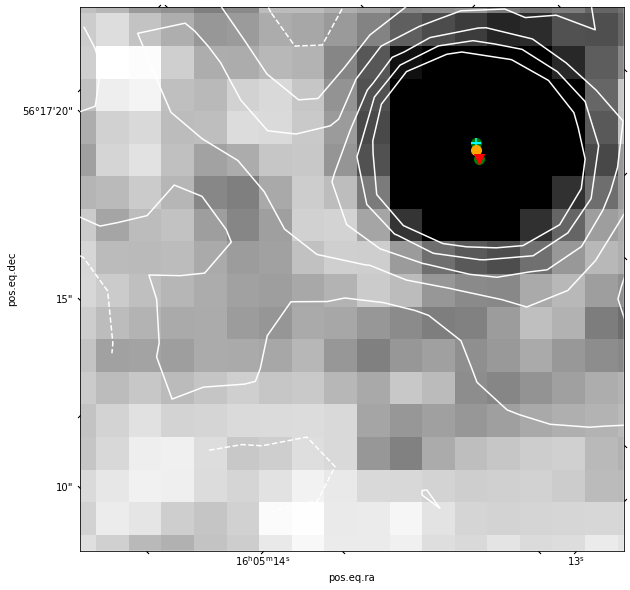

contours are at [-7.82182776e-05 -3.05534453e-05  1.71113870e-05  6.47762192e-05
  1.12441052e-04  1.60105884e-04  2.07770716e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


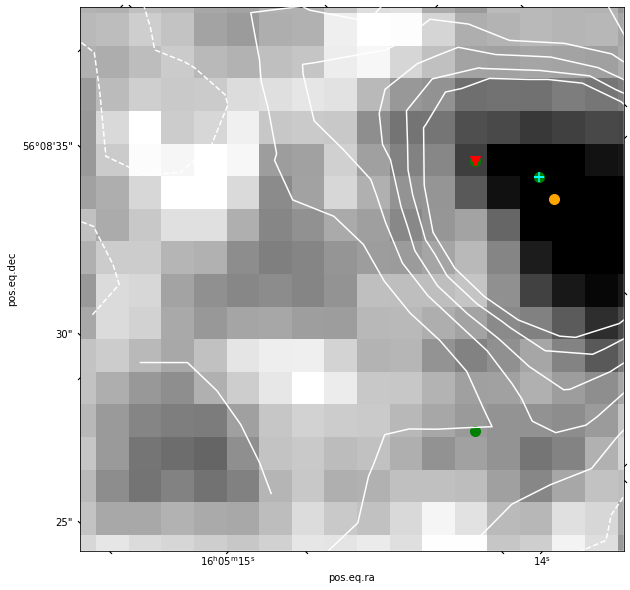

contours are at [-6.23828519e-05 -2.16869845e-05  1.90088829e-05  5.97047503e-05
  1.00400618e-04  1.41096485e-04  1.81792352e-04]
plotting 4 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


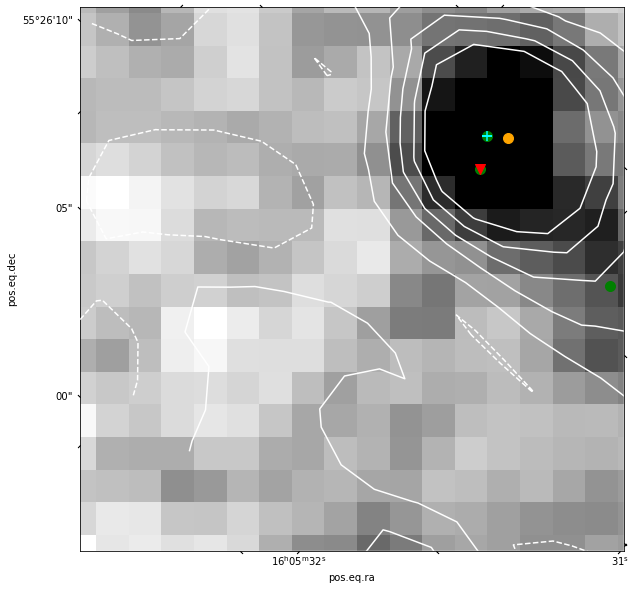

contours are at [-6.41579546e-05 -2.10998183e-05  2.19583180e-05  6.50164544e-05
  1.08074591e-04  1.51132727e-04  1.94190863e-04]
plotting 3 sources
plotting 1 sources
plotting 2 sources
plotting 1 sources


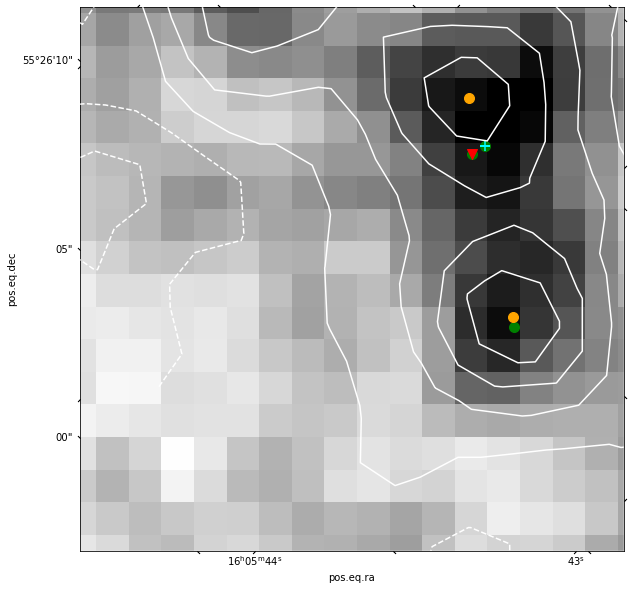

contours are at [-3.55887224e-05 -5.61331083e-06  2.43621007e-05  5.43375123e-05
  8.43129238e-05  1.14288335e-04  1.44263747e-04]
plotting 5 sources
plotting 2 sources
plotting 2 sources
plotting 1 sources


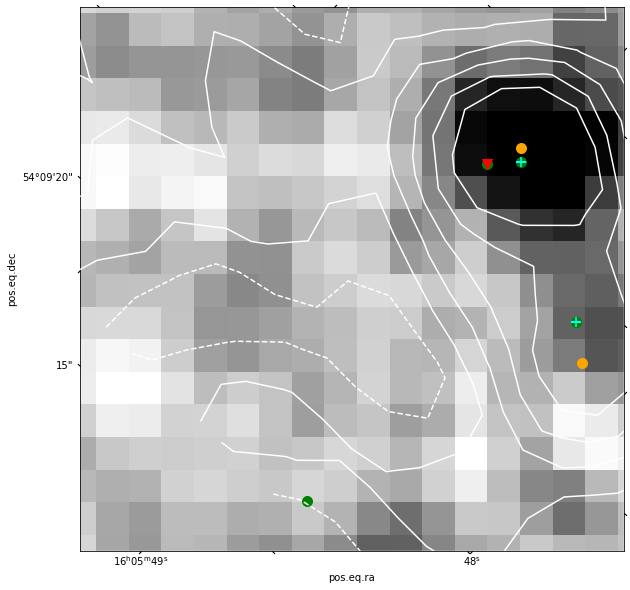

contours are at [-8.36471277e-05 -2.16576967e-05  4.03317344e-05  1.02321165e-04
  1.64310596e-04  2.26300028e-04  2.88289459e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


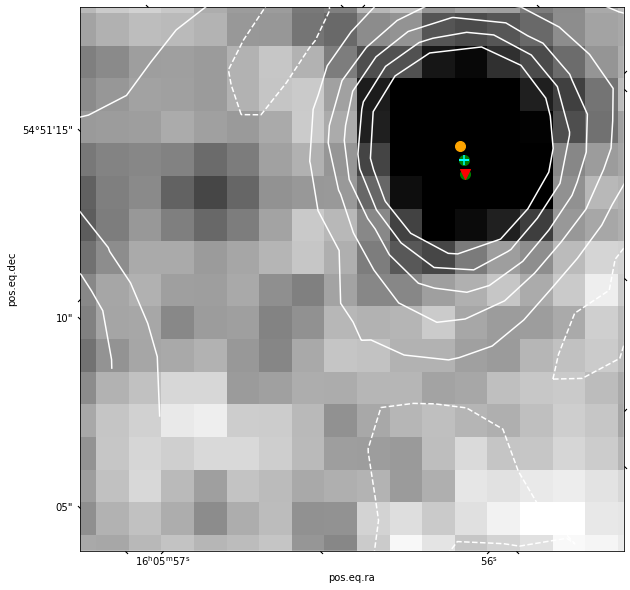

contours are at [-5.89410337e-05 -2.70683654e-05  4.80430298e-06  3.66769713e-05
  6.85496397e-05  1.00422308e-04  1.32294976e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


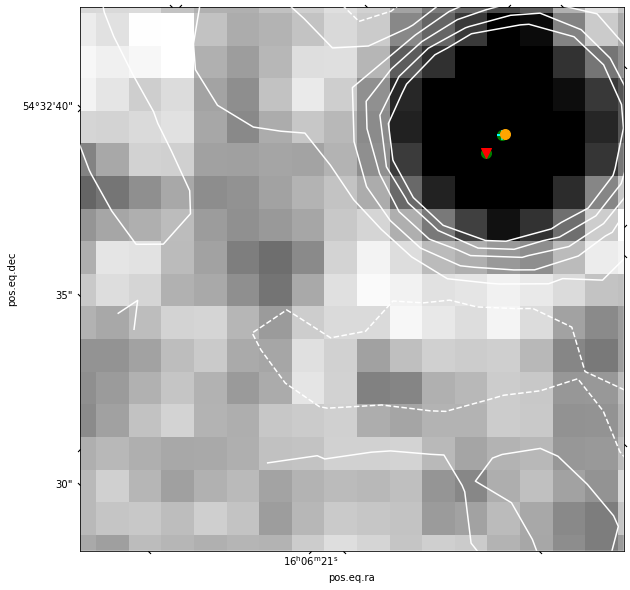

contours are at [-5.78177636e-05 -1.73582534e-05  2.31012569e-05  6.35607671e-05
  1.04020277e-04  1.44479788e-04  1.84939298e-04]
plotting 2 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


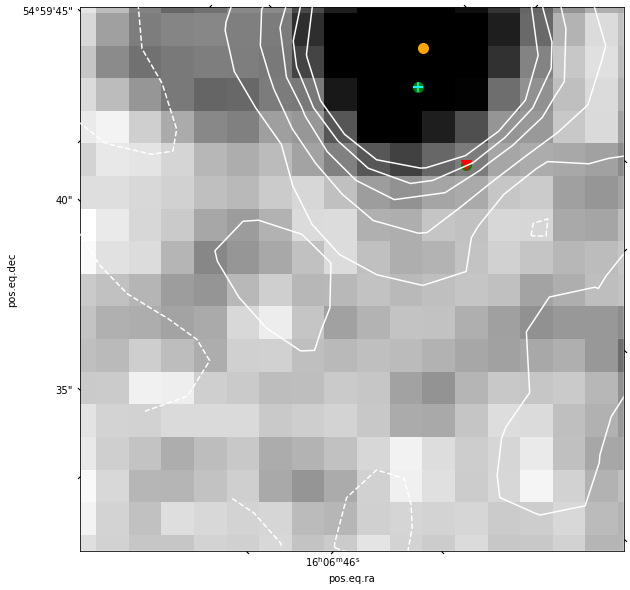

contours are at [-6.04132772e-05 -2.56756004e-05  9.06207647e-06  4.37997533e-05
  7.85374301e-05  1.13275107e-04  1.48012784e-04]
plotting 4 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


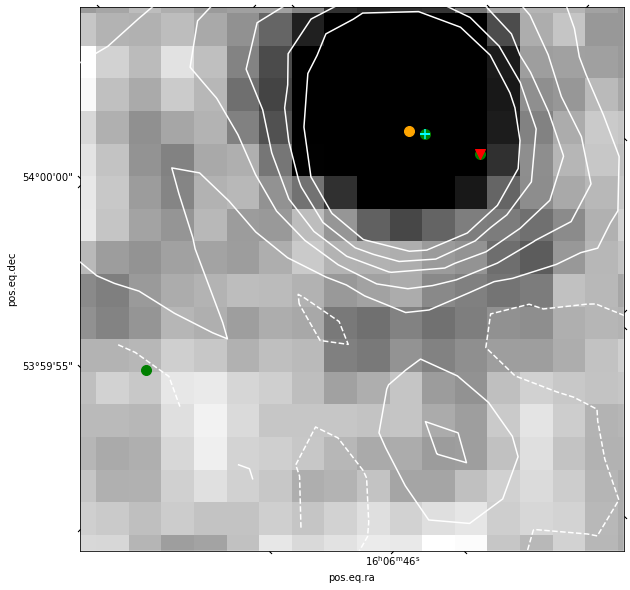

contours are at [-5.71924202e-05 -2.39779824e-05  9.23645526e-06  4.24508930e-05
  7.56653307e-05  1.08879768e-04  1.42094206e-04]
plotting 4 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


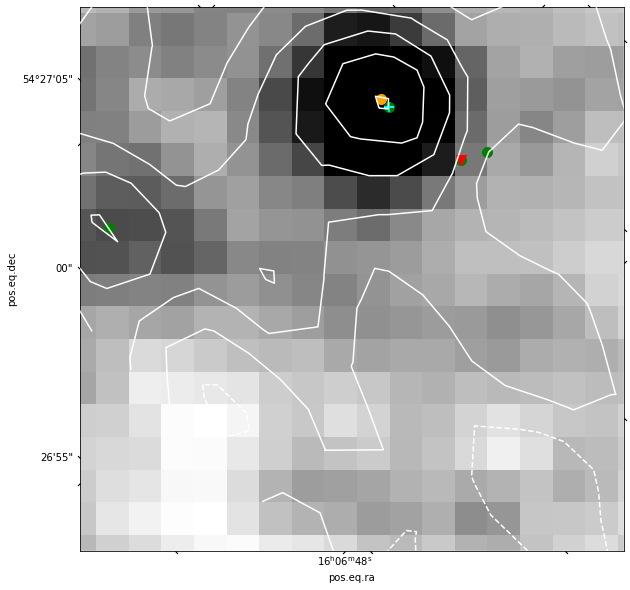

contours are at [-4.31387020e-05 -1.73761815e-05  8.38633888e-06  3.41488593e-05
  5.99113797e-05  8.56739001e-05  1.11436421e-04]
plotting 4 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


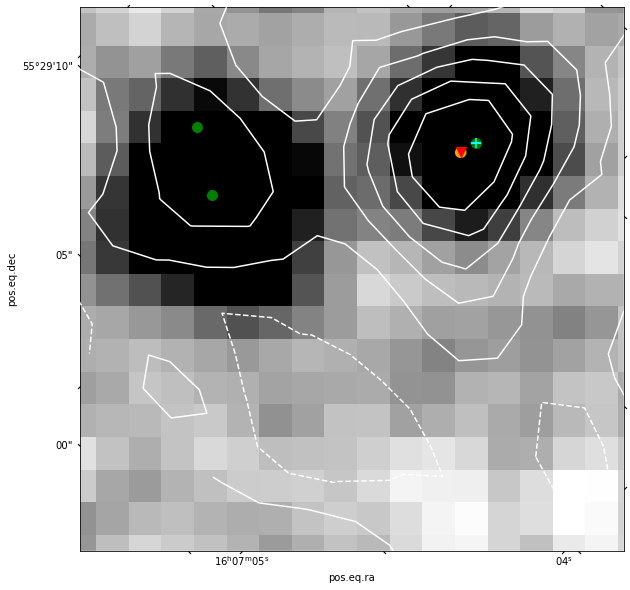

contours are at [-6.48810003e-05 -2.71569020e-05  1.05671963e-05  4.82912946e-05
  8.60153929e-05  1.23739491e-04  1.61463589e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


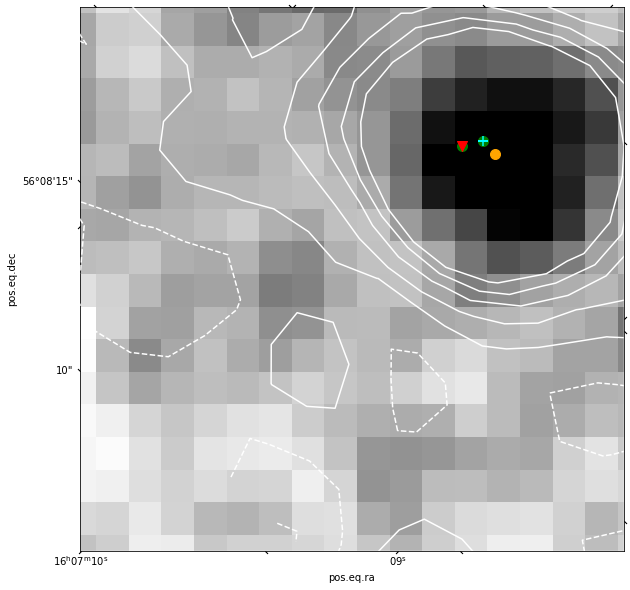

contours are at [-6.96462731e-05 -3.08015313e-05  8.04321050e-06  4.68879523e-05
  8.57326941e-05  1.24577436e-04  1.63422178e-04]
plotting 6 sources
plotting 1 sources
plotting 2 sources
plotting 1 sources


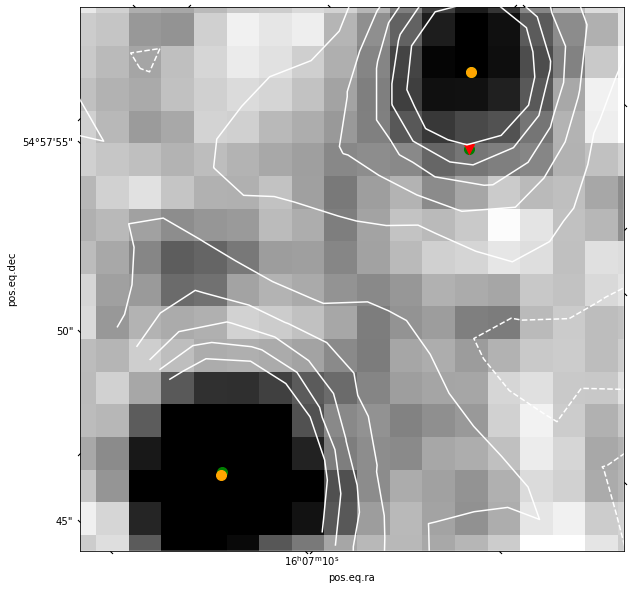

contours are at [-7.02563949e-05 -2.54330713e-05  1.93902523e-05  6.42135759e-05
  1.09036899e-04  1.53860223e-04  1.98683547e-04]
plotting 4 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


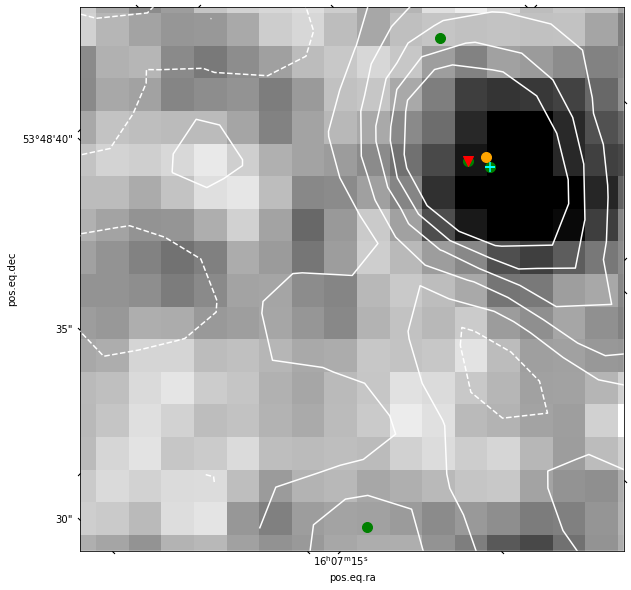

contours are at [-6.18472176e-05 -2.58229923e-05  1.02012330e-05  4.62254582e-05
  8.22496835e-05  1.18273909e-04  1.54298134e-04]
plotting 4 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


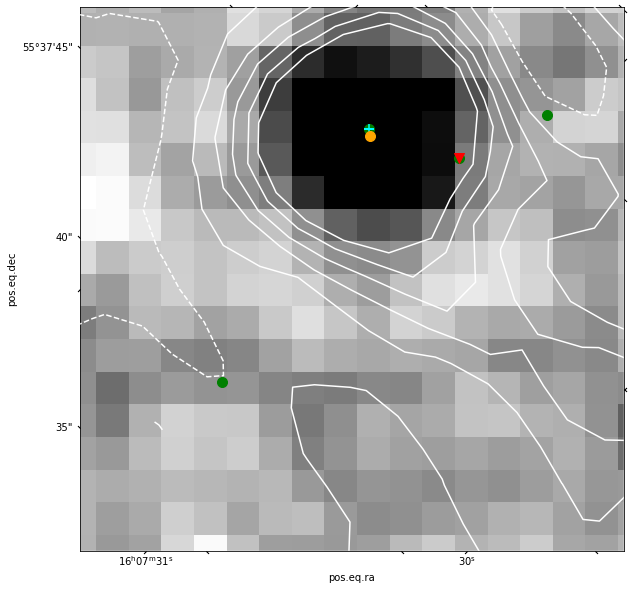

contours are at [-5.90514715e-05 -1.66528082e-05  2.57458551e-05  6.81445184e-05
  1.10543182e-04  1.52941845e-04  1.95340508e-04]
plotting 7 sources
plotting 1 sources
plotting 2 sources
plotting 1 sources


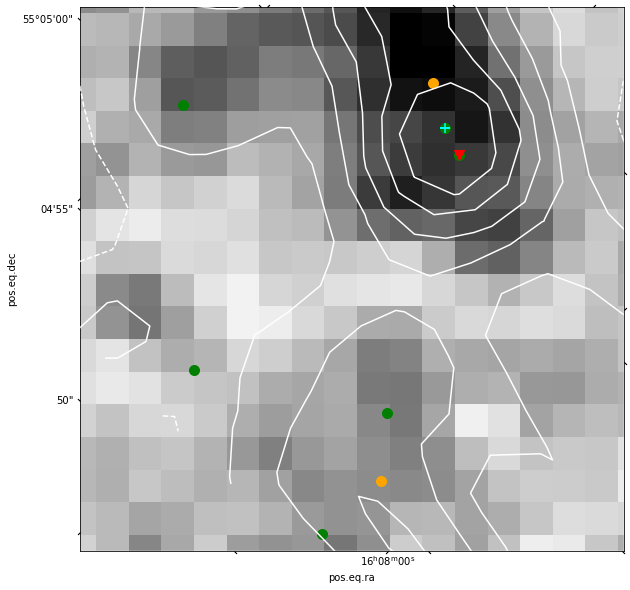

contours are at [-6.35945193e-05 -1.63775392e-05  3.08394409e-05  7.80564211e-05
  1.25273401e-04  1.72490381e-04  2.19707361e-04]
plotting 4 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


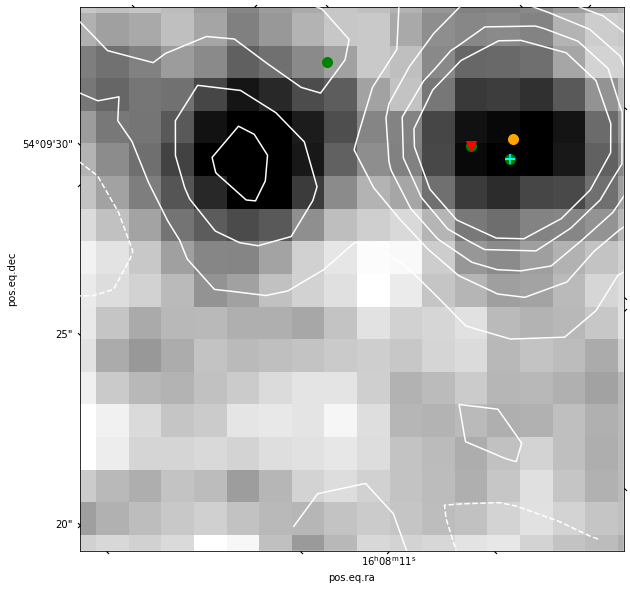

contours are at [-4.53592155e-05 -8.77339581e-06  2.78124239e-05  6.43982436e-05
  1.00984063e-04  1.37569883e-04  1.74155703e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


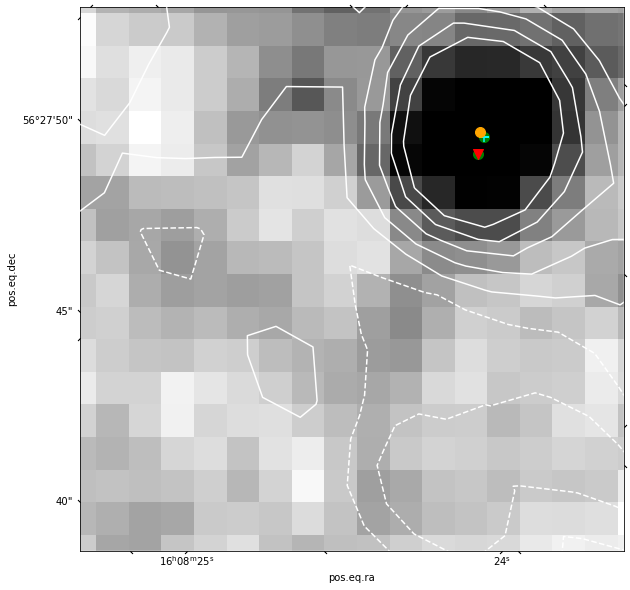

contours are at [-1.03729525e-04 -5.19082842e-05 -8.70433586e-08  5.17341975e-05
  1.03555438e-04  1.55376679e-04  2.07197920e-04]
plotting 8 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


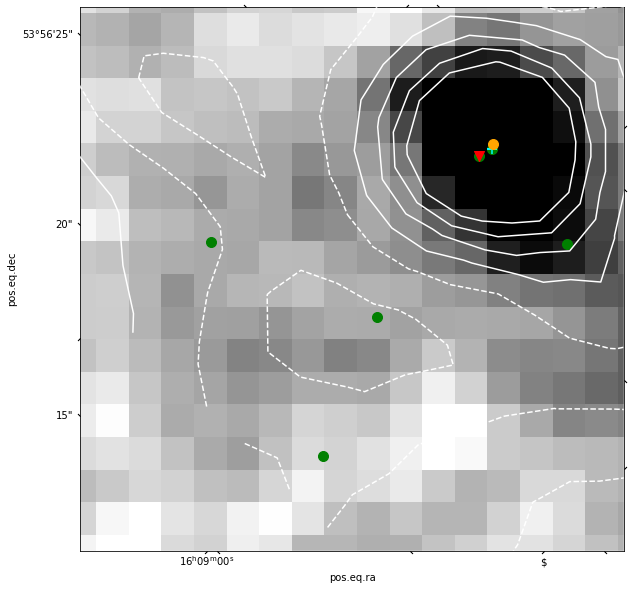

contours are at [-6.79146741e-05 -2.90915789e-05  9.73151625e-06  4.85546114e-05
  8.73777066e-05  1.26200802e-04  1.65023897e-04]
plotting 2 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


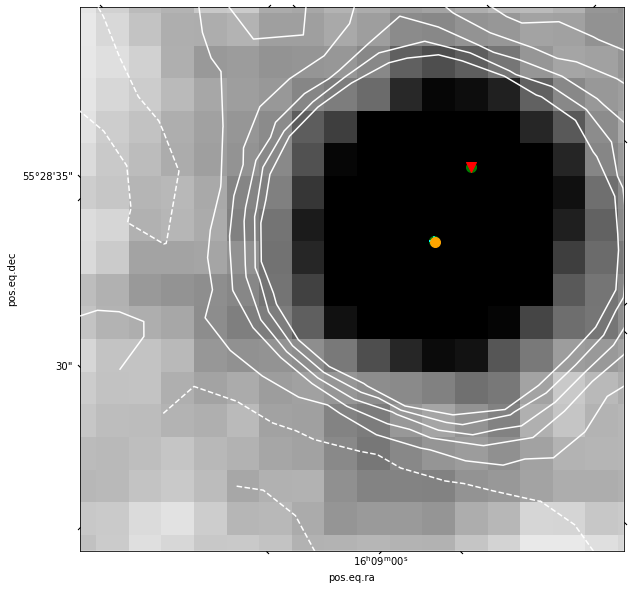

contours are at [-4.78984849e-05 -1.44200529e-05  1.90583792e-05  5.25368112e-05
  8.60152433e-05  1.19493675e-04  1.52972107e-04]
plotting 4 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


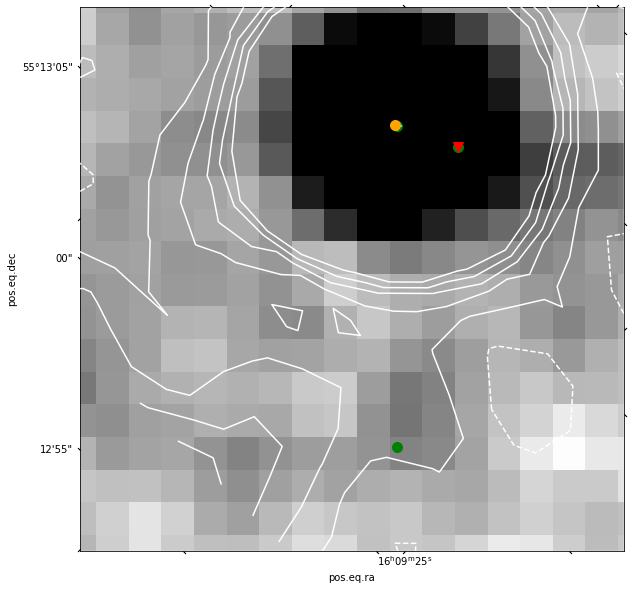

contours are at [-5.51909749e-05 -2.24099855e-05  1.03710038e-05  4.31519932e-05
  7.59329826e-05  1.08713972e-04  1.41494961e-04]
plotting 4 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


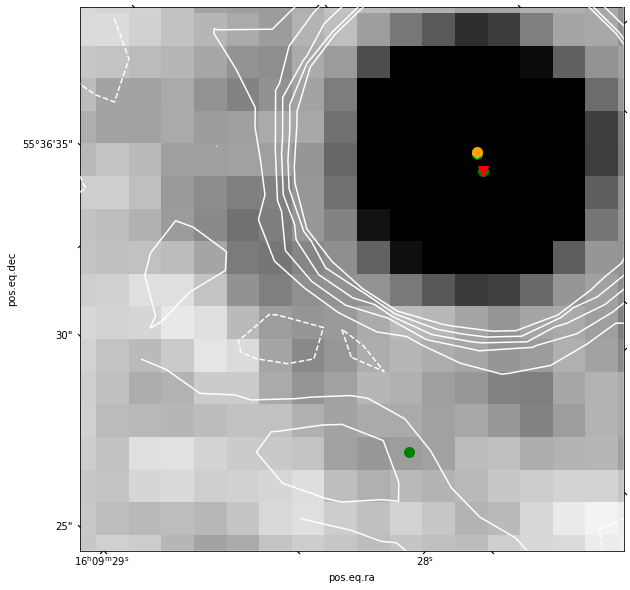

contours are at [-6.62525094e-05 -1.29841230e-05  4.02842634e-05  9.35526499e-05
  1.46821036e-04  2.00089423e-04  2.53357809e-04]
plotting 4 sources
plotting 1 sources
plotting 2 sources
plotting 1 sources


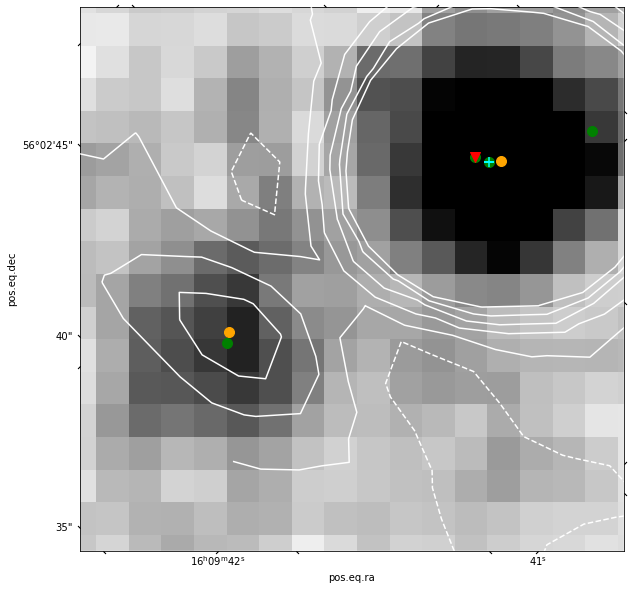

contours are at [-4.77412622e-05 -9.42646925e-06  2.88883237e-05  6.72031167e-05
  1.05517910e-04  1.43832703e-04  1.82147496e-04]
plotting 4 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


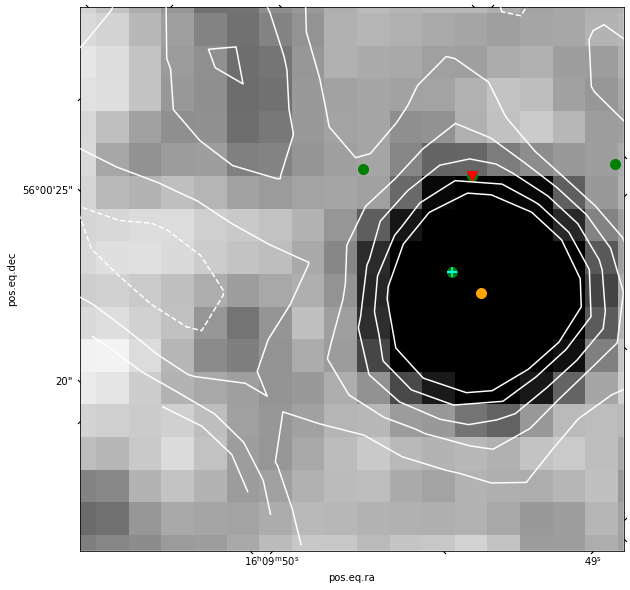

contours are at [-4.69413739e-05 -1.72324549e-05  1.24764641e-05  4.21853832e-05
  7.18943022e-05  1.01603221e-04  1.31312140e-04]
plotting 6 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


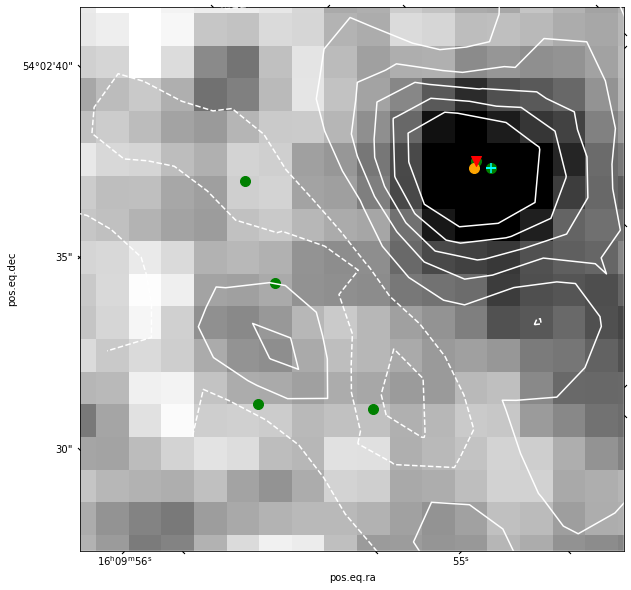

contours are at [-9.88422890e-05 -3.76901982e-05  2.34618926e-05  8.46139834e-05
  1.45766074e-04  2.06918165e-04  2.68070256e-04]
plotting 5 sources
plotting 2 sources
plotting 2 sources
plotting 1 sources


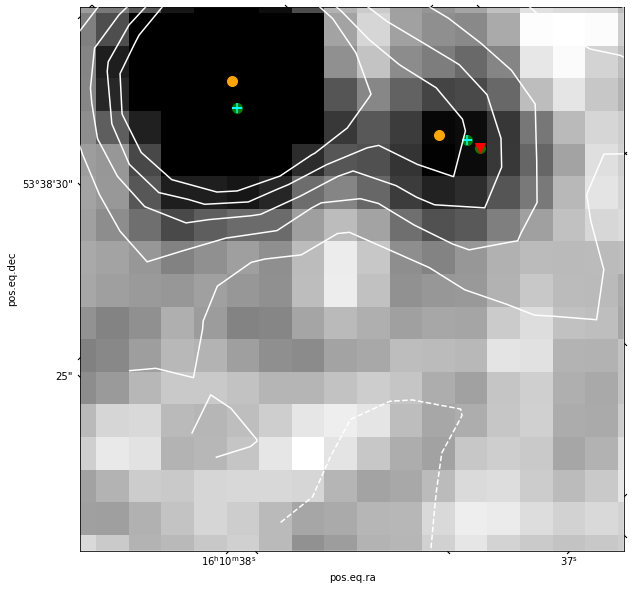

contours are at [-5.01805083e-05 -1.31566120e-05  2.38672843e-05  6.08911805e-05
  9.79150768e-05  1.34938973e-04  1.71962869e-04]
plotting 7 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


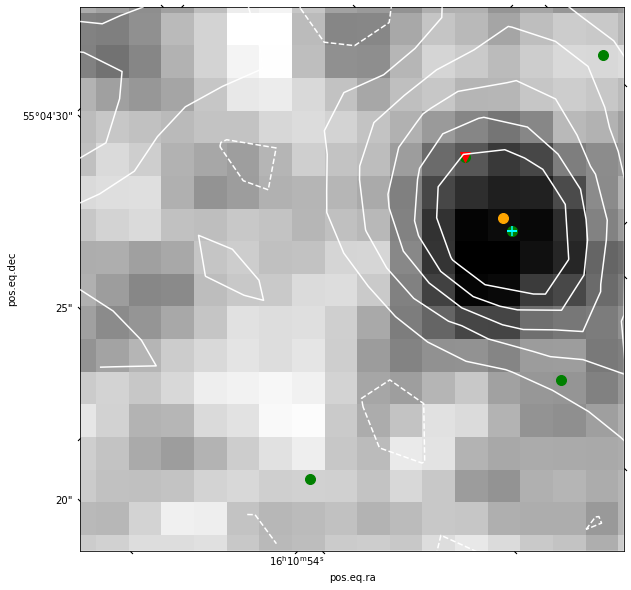

contours are at [-4.88867236e-05 -1.97353686e-05  9.41598642e-06  3.85673414e-05
  6.77186965e-05  9.68700515e-05  1.26021407e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


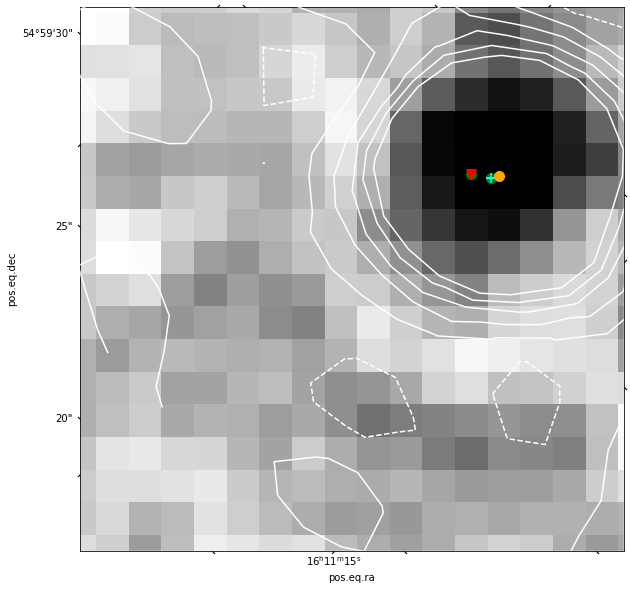

contours are at [-4.19774056e-05 -1.09502202e-05  2.00769653e-05  5.11041507e-05
  8.21313362e-05  1.13158522e-04  1.44185707e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


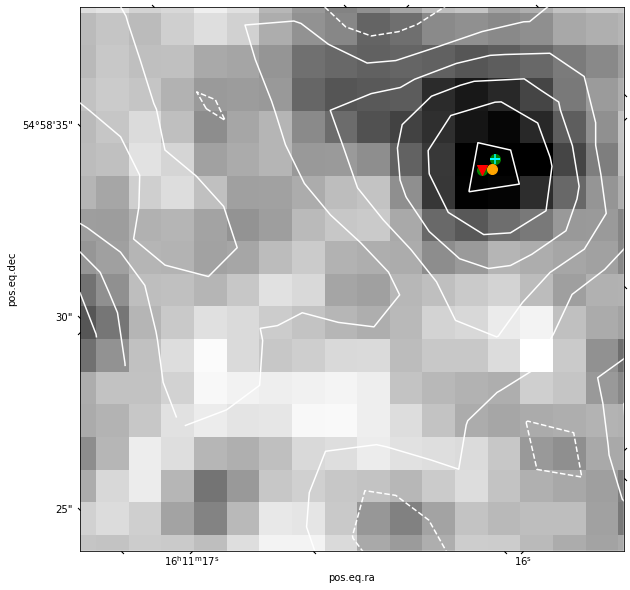

contours are at [-5.07941494e-05 -1.88842004e-05  1.30257486e-05  4.49356976e-05
  7.68456466e-05  1.08755596e-04  1.40665545e-04]
plotting 2 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


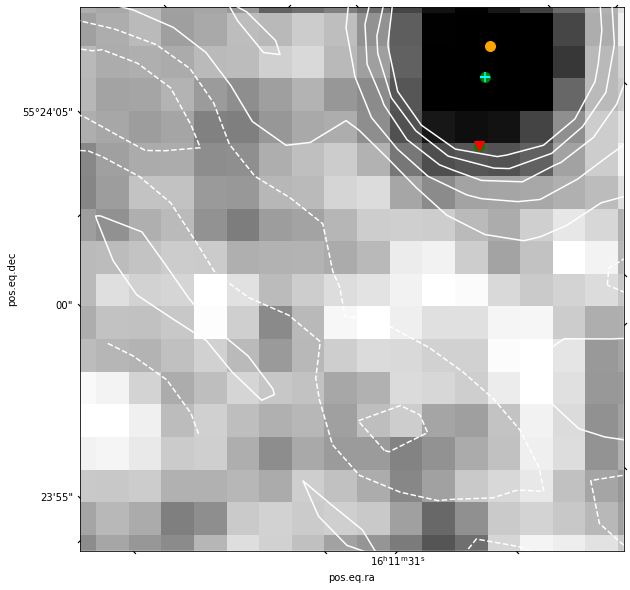

contours are at [-4.03599948e-05 -7.92461197e-06  2.45107709e-05  5.69461538e-05
  8.93815366e-05  1.21816919e-04  1.54252302e-04]
plotting 4 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


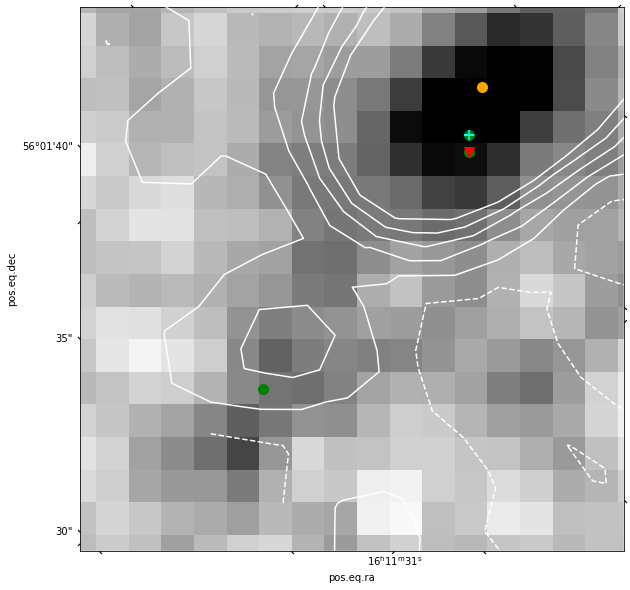

contours are at [-5.96905309e-05 -7.91992047e-06  4.38506899e-05  9.56213003e-05
  1.47391911e-04  1.99162521e-04  2.50933131e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


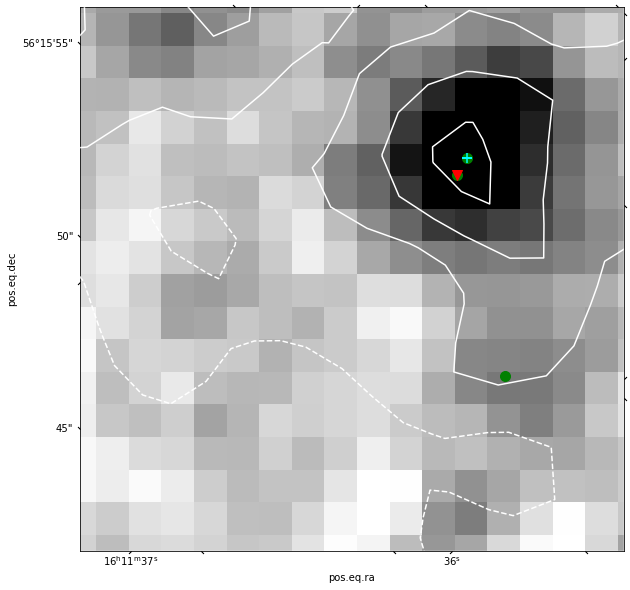

contours are at [-6.32166122e-05 -1.52200392e-05  3.27765338e-05  8.07731068e-05
  1.28769680e-04  1.76766253e-04  2.24762826e-04]
plotting 5 sources
plotting 2 sources
plotting 2 sources
plotting 1 sources


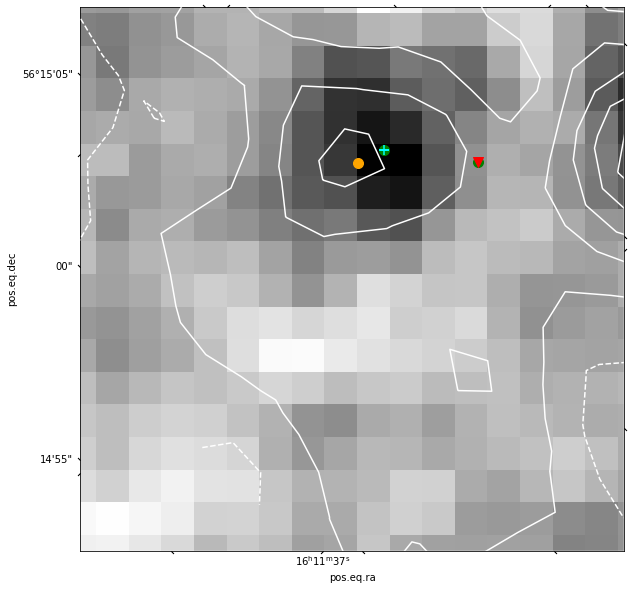

contours are at [-3.49254723e-05 -6.20860394e-06  2.25082645e-05  5.12251328e-05
  7.99420012e-05  1.08658870e-04  1.37375738e-04]
plotting 6 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


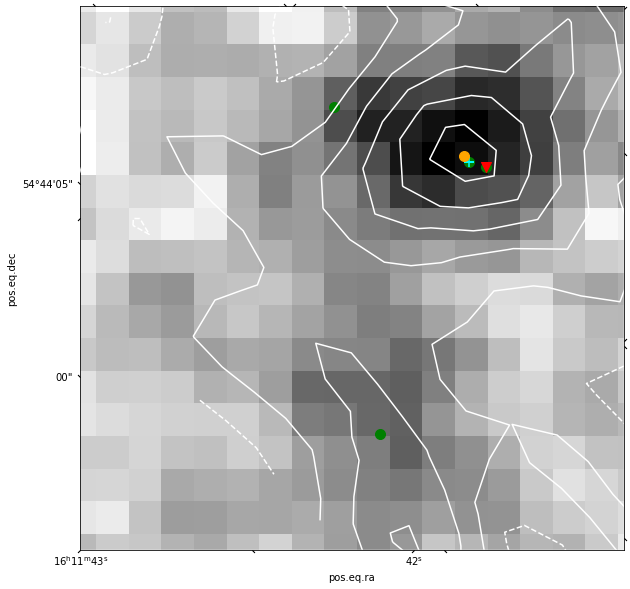

contours are at [-5.32554980e-05 -1.75136100e-05  1.82282779e-05  5.39701659e-05
  8.97120538e-05  1.25453942e-04  1.61195830e-04]
plotting 5 sources
plotting 1 sources
plotting 2 sources
plotting 1 sources


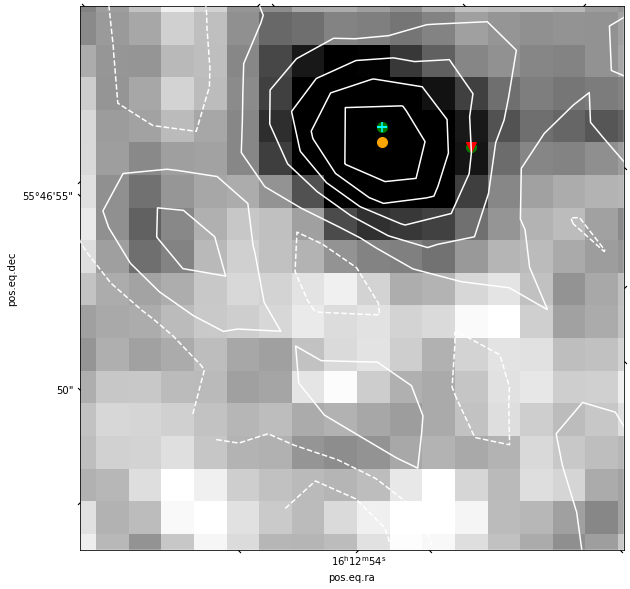

contours are at [-5.10799762e-05 -1.95789847e-05  1.19220068e-05  4.34229983e-05
  7.49239899e-05  1.06424981e-04  1.37925973e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


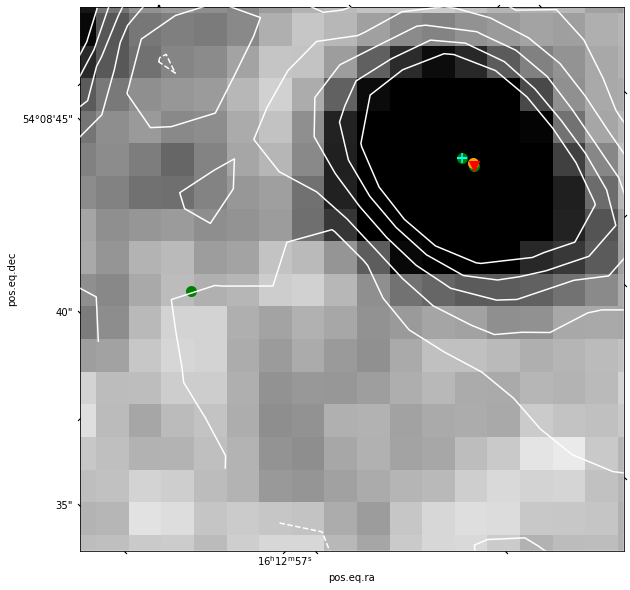

contours are at [-5.01151966e-05 -2.25093063e-05  5.09658410e-06  3.27024745e-05
  6.03083648e-05  8.79142552e-05  1.15520146e-04]
plotting 4 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


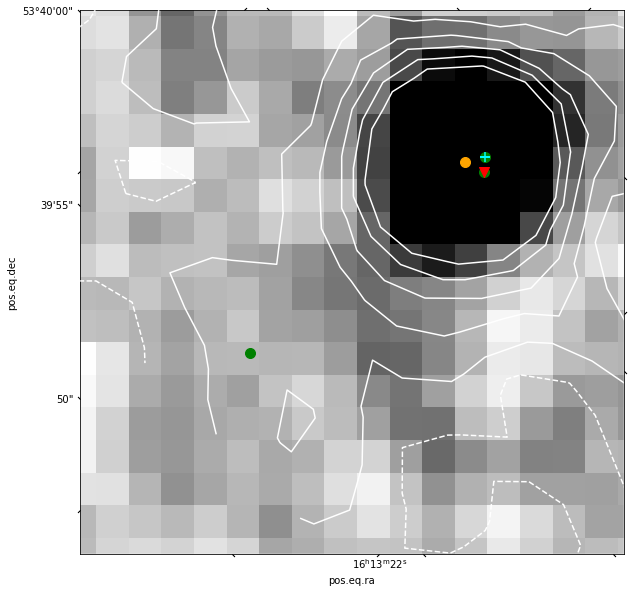

contours are at [-4.06716442e-05 -1.58812677e-05  8.90910877e-06  3.36994853e-05
  5.84898618e-05  8.32802383e-05  1.08070615e-04]
plotting 5 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


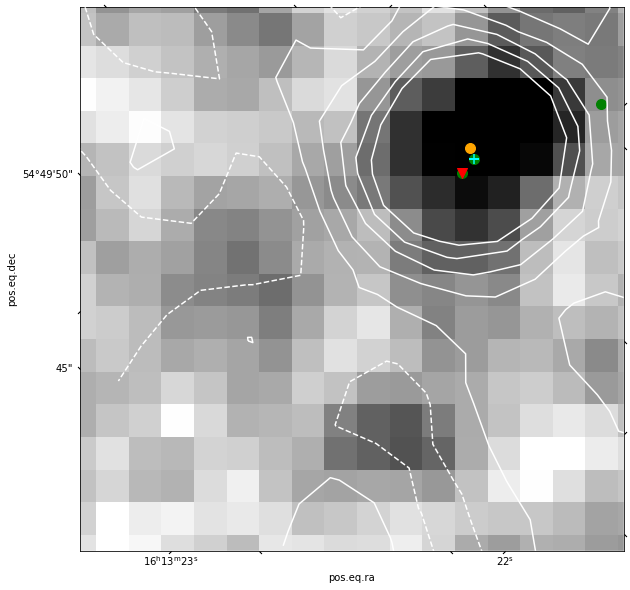

contours are at [-5.46527146e-05 -2.39569804e-05  6.73875377e-06  3.74344880e-05
  6.81302222e-05  9.88259564e-05  1.29521691e-04]
plotting 5 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


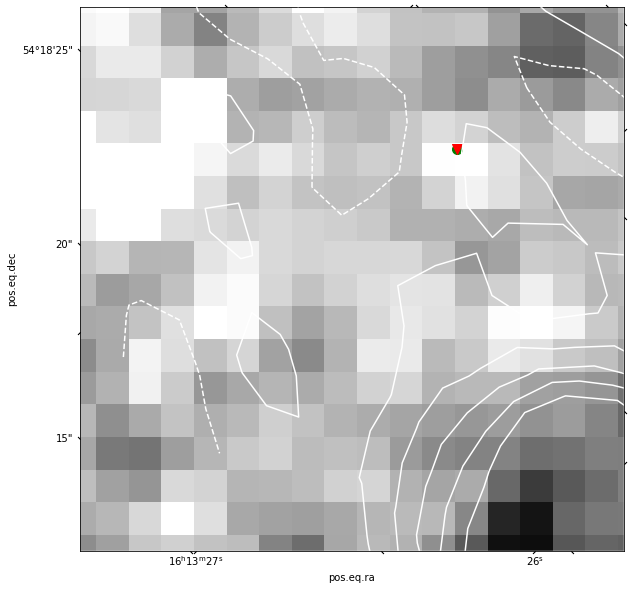

contours are at [-7.69325555e-05 -8.37507502e-06  6.01824054e-05  1.28739886e-04
  1.97297366e-04  2.65854847e-04  3.34412327e-04]
plotting 4 sources
plotting 1 sources
plotting 2 sources
plotting 1 sources


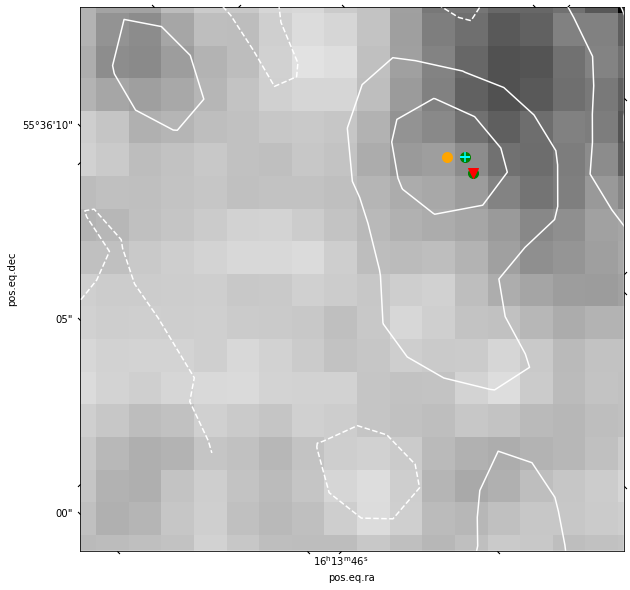

contours are at [-6.59525114e-05 -1.98433347e-05  2.62658420e-05  7.23750187e-05
  1.18484195e-04  1.64593372e-04  2.10702549e-04]
plotting 2 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


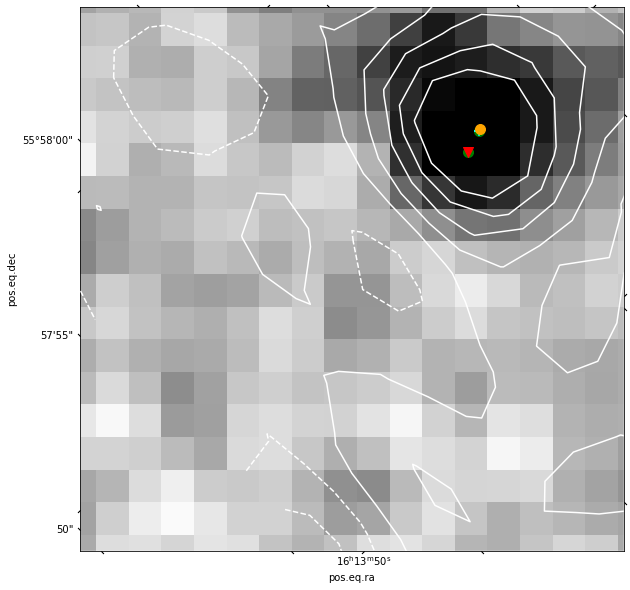

contours are at [-6.41701477e-05 -9.76492368e-06  4.46403003e-05  9.90455243e-05
  1.53450748e-04  2.07855972e-04  2.62261196e-04]
plotting 5 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


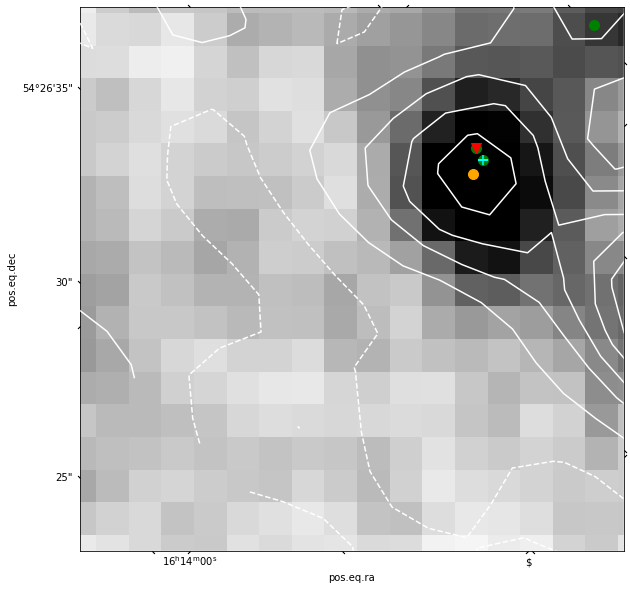

contours are at [-5.85656710e-05 -2.59024072e-05  6.76085669e-06  3.94241205e-05
  7.20873844e-05  1.04750648e-04  1.37413912e-04]
plotting 4 sources
plotting 1 sources
plotting 2 sources
plotting 1 sources


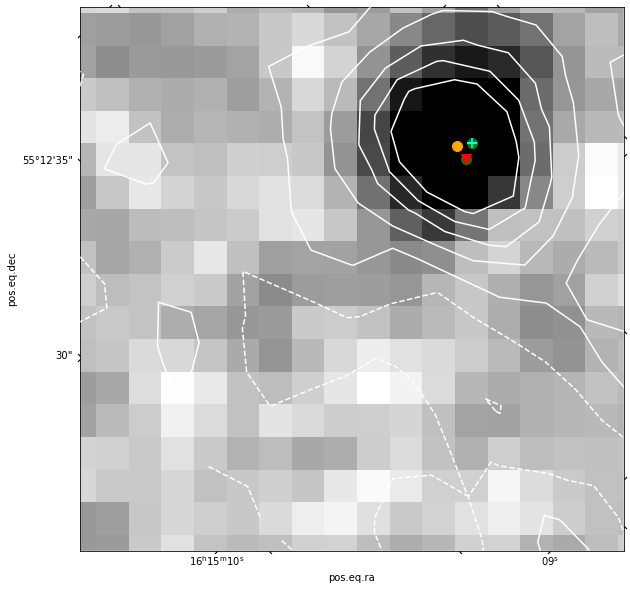

contours are at [-1.24632578e-04 -2.72507514e-05  7.01310754e-05  1.67512902e-04
  2.64894729e-04  3.62276556e-04  4.59658383e-04]
plotting 3 sources
plotting 1 sources
plotting 2 sources
plotting 1 sources


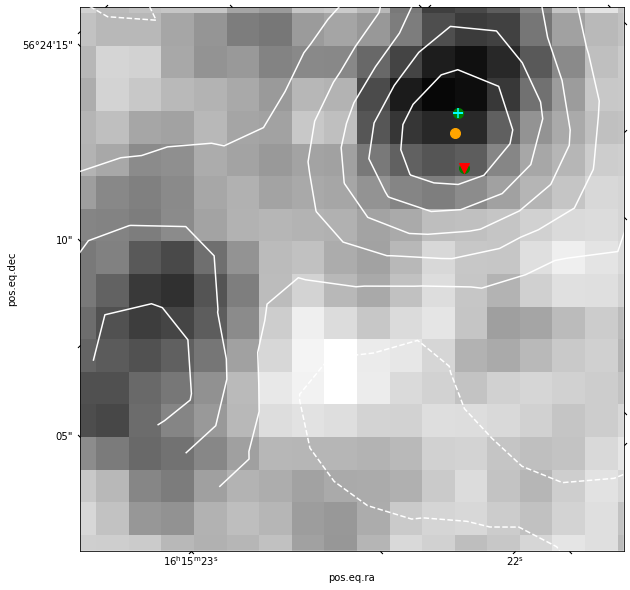

contours are at [-4.80827608e-05 -4.46501847e-06  3.91527238e-05  8.27704661e-05
  1.26388208e-04  1.70005951e-04  2.13623693e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


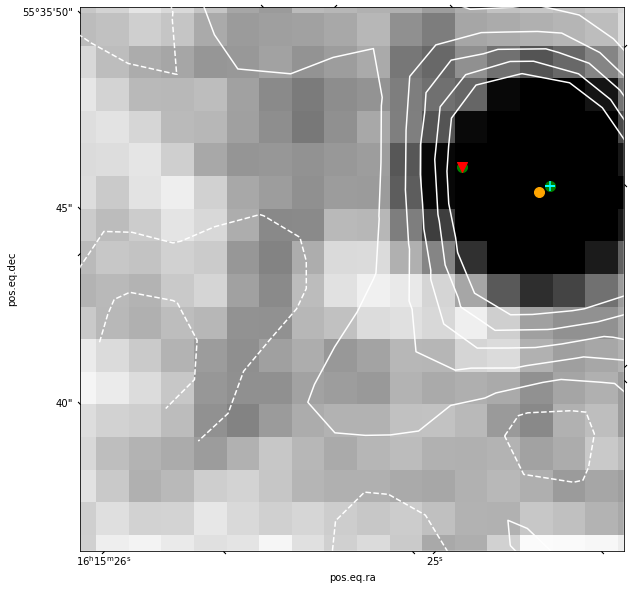

contours are at [-6.18387938e-05 -2.20087816e-05  1.78212305e-05  5.76512426e-05
  9.74812547e-05  1.37311267e-04  1.77141279e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


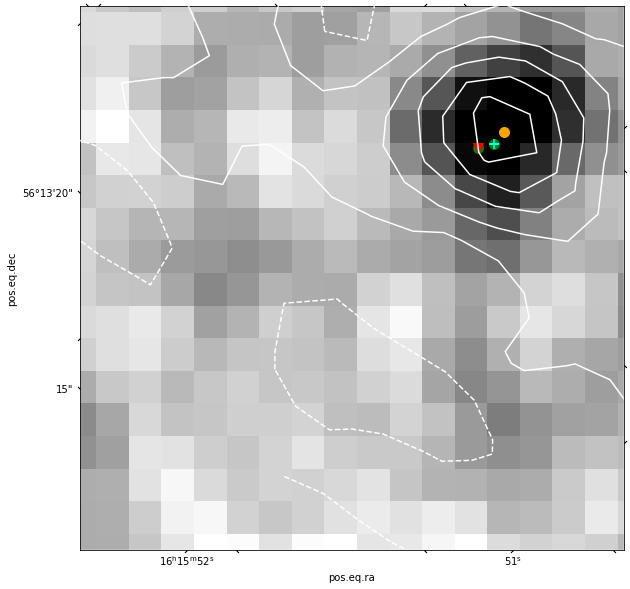

contours are at [-4.26341838e-05 -1.28247307e-05  1.69847224e-05  4.67941755e-05
  7.66036286e-05  1.06413082e-04  1.36222535e-04]
plotting 6 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


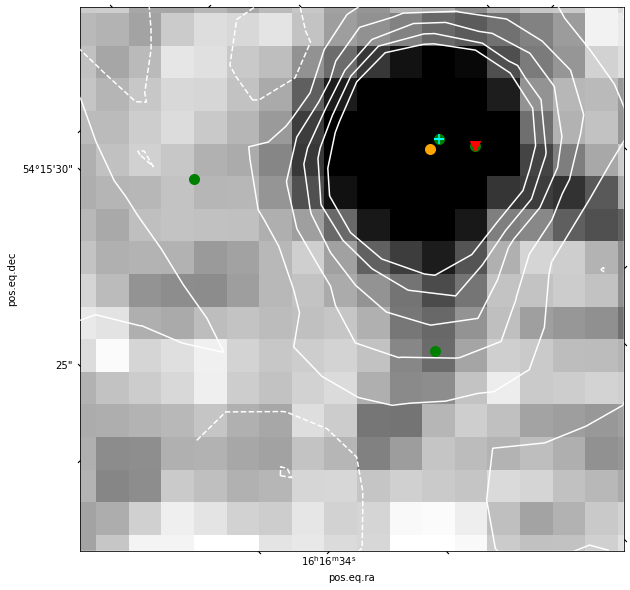

contours are at [-5.18524835e-05 -1.70689963e-05  1.77144908e-05  5.24979779e-05
  8.72814650e-05  1.22064952e-04  1.56848439e-04]
plotting 2 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


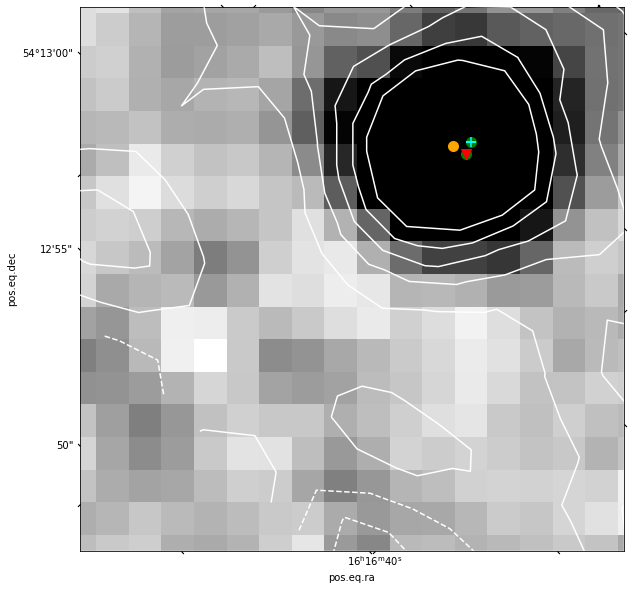

contours are at [8.44361316e-06 3.85283873e-05 6.86131615e-05 9.86979356e-05
 1.28782710e-04 1.58867484e-04 1.88952258e-04]
plotting 2 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


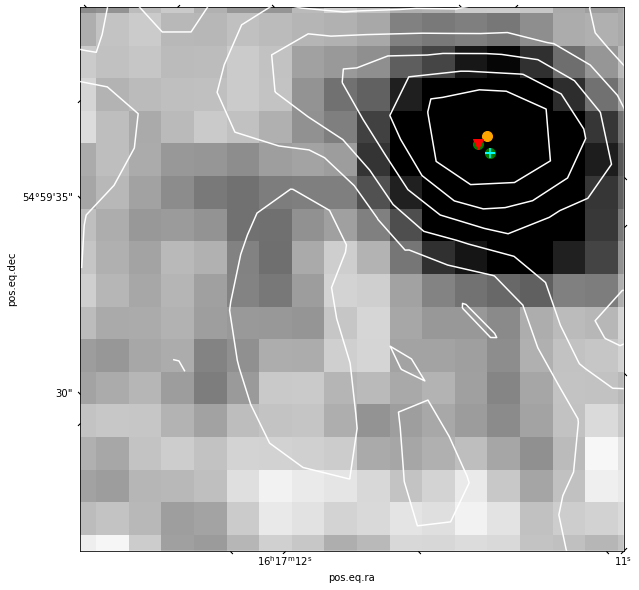

contours are at [-5.96002096e-05 -1.05424049e-05  3.85153998e-05  8.75732045e-05
  1.36631009e-04  1.85688814e-04  2.34746619e-04]
plotting 3 sources
plotting 1 sources
plotting 2 sources
plotting 1 sources


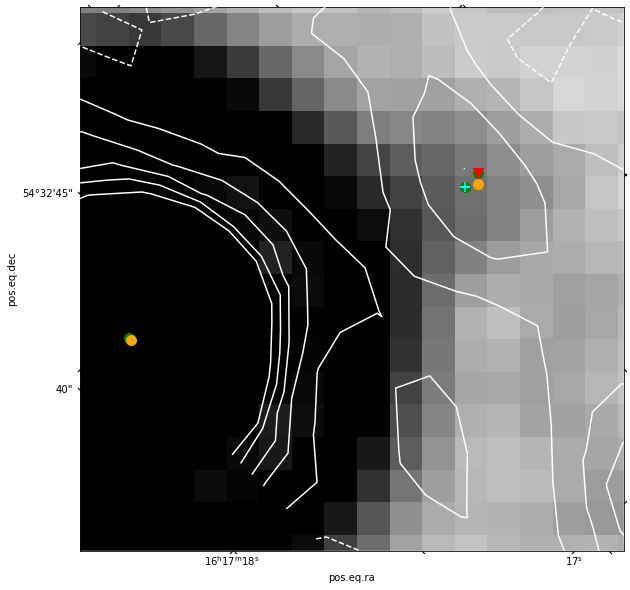

contours are at [-5.78126036e-05 -2.51001157e-05  7.61237217e-06  4.03248601e-05
  7.30373479e-05  1.05749836e-04  1.38462324e-04]
plotting 5 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


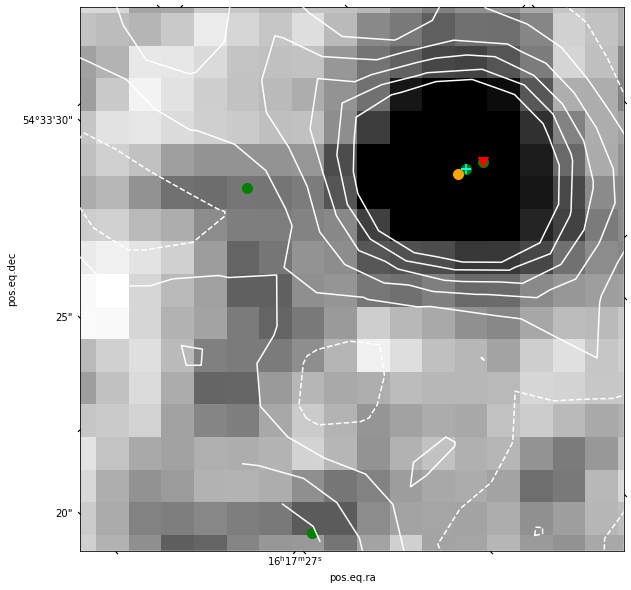

contours are at [-4.86498030e-05 -2.36535681e-05  1.34266673e-06  2.63389016e-05
  5.13351365e-05  7.63313714e-05  1.01327606e-04]
plotting 2 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


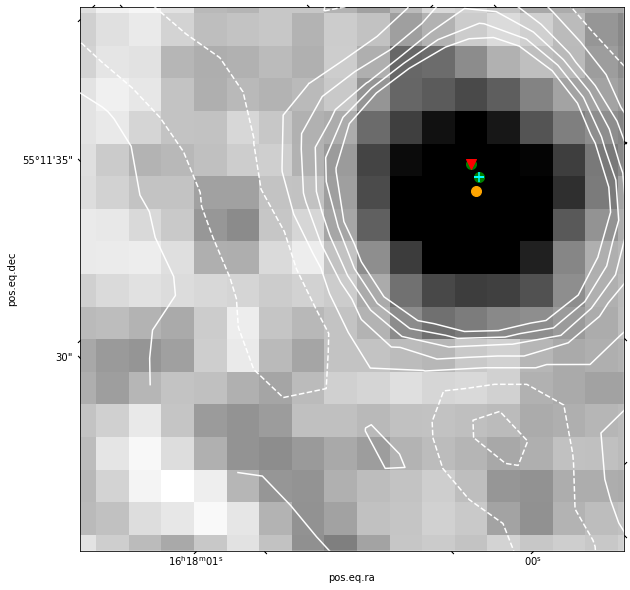

contours are at [-5.28958386e-05 -1.98422780e-05  1.32112825e-05  4.62648431e-05
  7.93184036e-05  1.12371964e-04  1.45425525e-04]
plotting 2 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


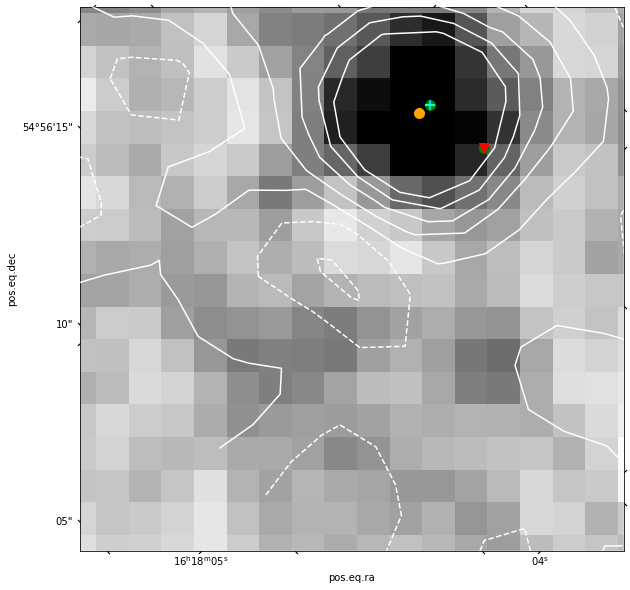

contours are at [-7.77077029e-05 -2.54988649e-05  2.67099731e-05  7.89188111e-05
  1.31127649e-04  1.83336487e-04  2.35545325e-04]
plotting 2 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


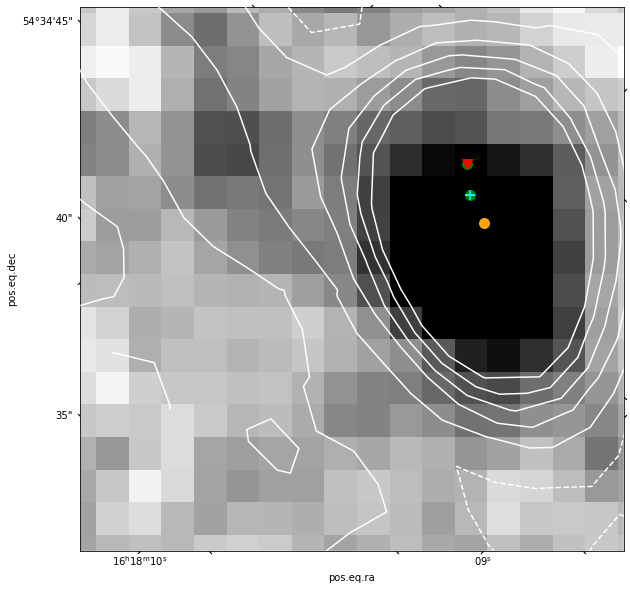

contours are at [-8.95843417e-05 -4.56887236e-05 -1.79310543e-06  4.21025127e-05
  8.59981309e-05  1.29893749e-04  1.73789367e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


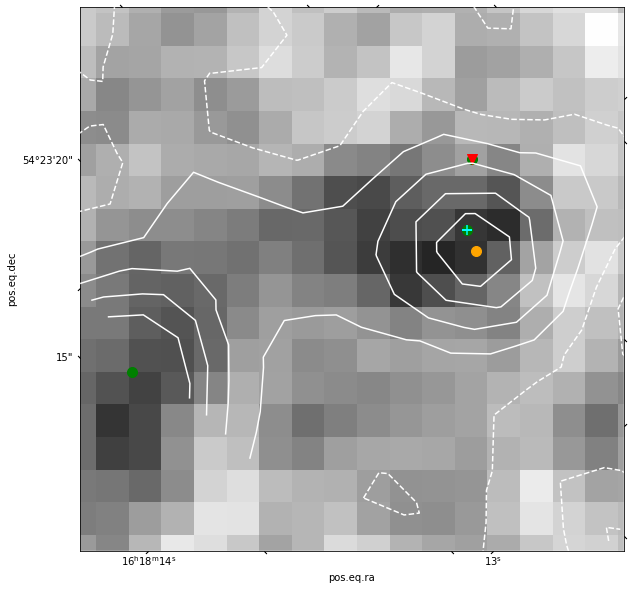

contours are at [-6.54573409e-05 -1.80866447e-05  2.92840516e-05  7.66547479e-05
  1.24025444e-04  1.71396140e-04  2.18766837e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


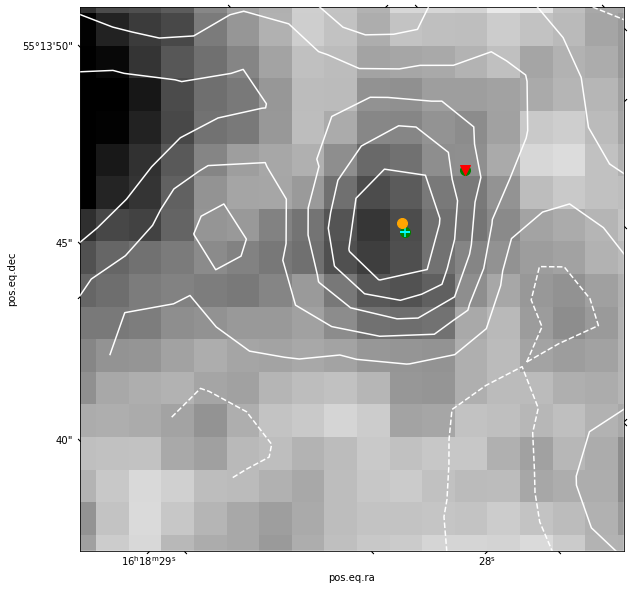

contours are at [-5.03284177e-05 -1.21058368e-05  2.61167440e-05  6.43393249e-05
  1.02561906e-04  1.40784487e-04  1.79007068e-04]
plotting 4 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


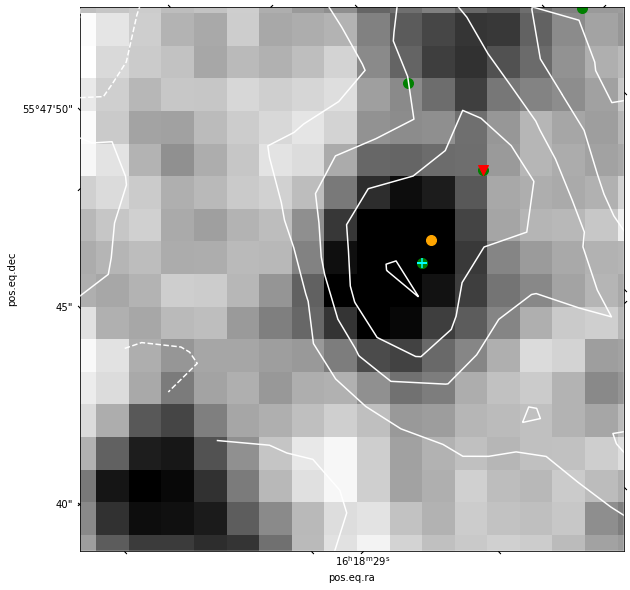

contours are at [-6.54046047e-05 -1.44931290e-05  3.64183466e-05  8.73298223e-05
  1.38241298e-04  1.89152774e-04  2.40064249e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


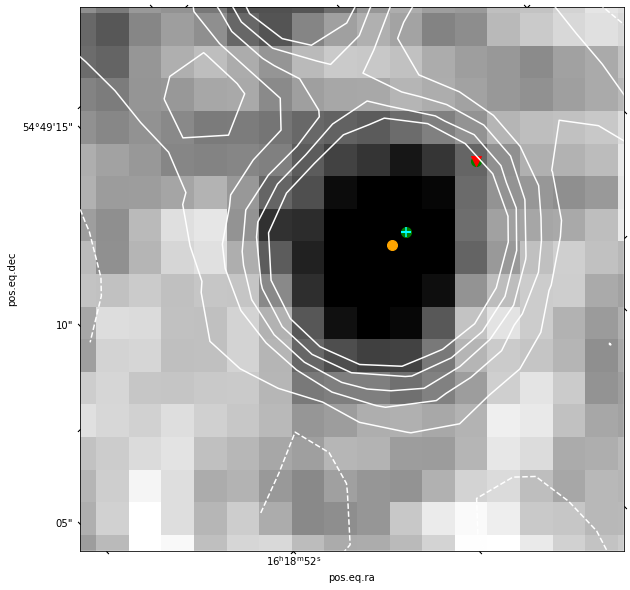

contours are at [-5.61530299e-05 -1.90970286e-05  1.79589726e-05  5.50149739e-05
  9.20709751e-05  1.29126976e-04  1.66182978e-04]
plotting 4 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


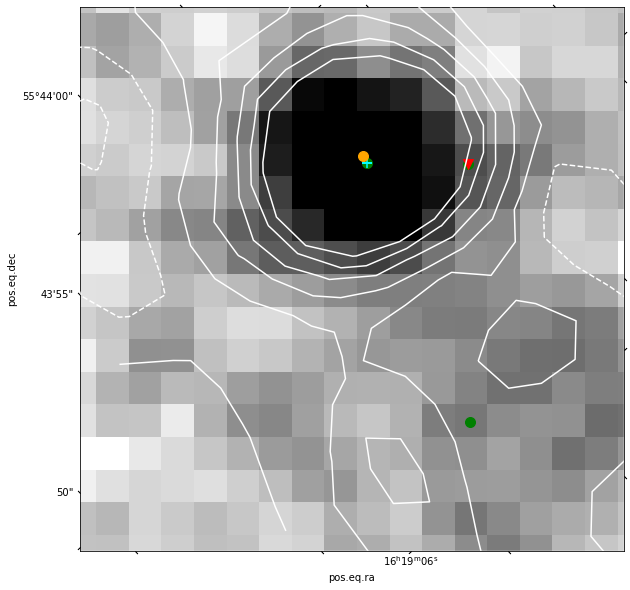

contours are at [-6.33774919e-05 -1.76872024e-05  2.80030871e-05  7.36933766e-05
  1.19383666e-04  1.65073956e-04  2.10764245e-04]
plotting 5 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


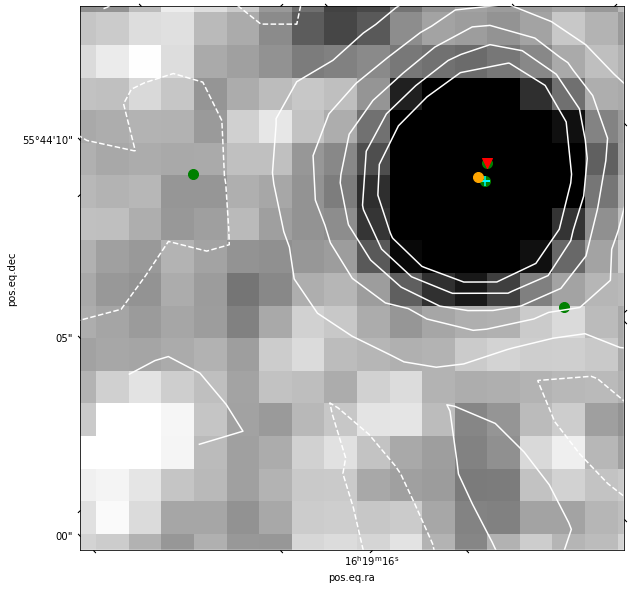

contours are at [-6.52619355e-05 -1.91401358e-05  2.69816639e-05  7.31034636e-05
  1.19225263e-04  1.65347063e-04  2.11468863e-04]
plotting 4 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


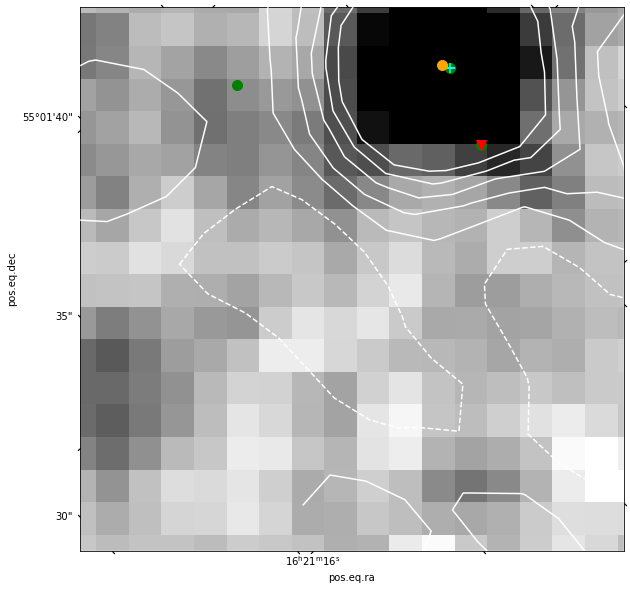

contours are at [-8.32535262e-05 -2.29981591e-05  3.72572079e-05  9.75125750e-05
  1.57767942e-04  2.18023309e-04  2.78278676e-04]
plotting 4 sources
plotting 2 sources
plotting 2 sources
plotting 1 sources


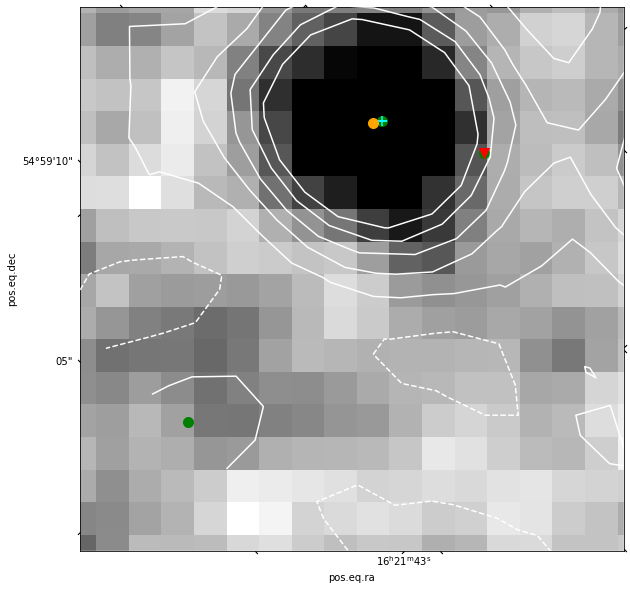

contours are at [-7.17272666e-05 -2.76615746e-05  1.64041174e-05  6.04698093e-05
  1.04535501e-04  1.48601193e-04  1.92666885e-04]
plotting 2 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


contours are at [-5.19844996e-05 -1.63414688e-05  1.93015621e-05  5.49445930e-05
  9.05876238e-05  1.26230655e-04  1.61873686e-04]
plotting 3 sources
plotting 1 sources
plotting 1 sources
plotting 1 sources


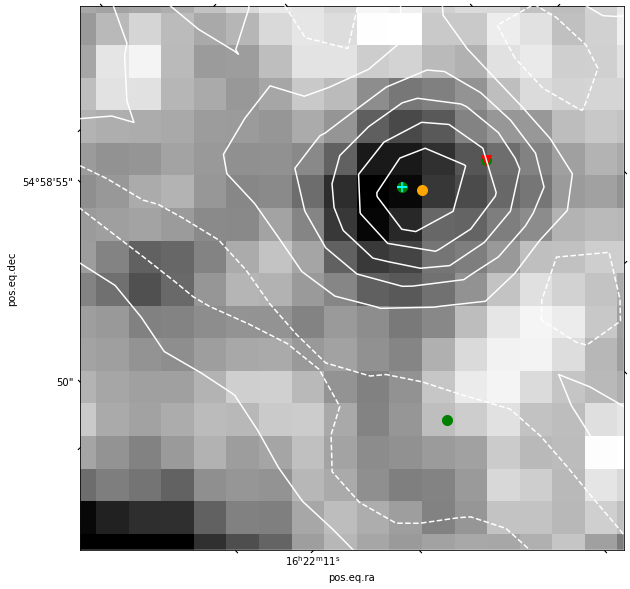

In [321]:
#mask = np.log10(joined['f_mips_24'])<0.1
x = np.log10(joined['f_mips_24'])
y = np.log10(joined['F_MIPS_24'])
mask = (x-y)>1.5

mask = metric/err>1
ra = joined[mask]['ra']
dec = joined[mask]['dec']

print(len(ra))
for n in range(len(ra)):
    image_plotting.plot_figure(im24,[mips_prior,lofar_mips_table,lofar_orig,joined[mask]],w_24,ra[n],dec[n],plot_params,contour_data=[radim_data,radim_wcs])

## Processing MIPS output

In [251]:
file_list = glob.glob('data/fir/MIPS/*/lofar_xidplus*.fits')
file_list.sort()
num_not = np.arange(428,860,1)

lofar_mips_table = Table.read(file_list[0])
for i,filename in enumerate(file_list[1:]):
    print(filename)
    if i%50==0:
        print(i)
    
    #print(filename)
    new_table = Table.read(filename,memmap=False)
    if len(new_table)!=100:
        print(filename)
        print('length of table is: {}'.format(len(new_table)))
    lofar_mips_table = vstack([lofar_mips_table,new_table])
data_rerun_table = lofar_mips_table

data/fir/MIPS/xidplus_run_1/lofar_xidplus_fir_1_rerun.fits
0
data/fir/MIPS/xidplus_run_10/lofar_xidplus_fir_10_rerun.fits
data/fir/MIPS/xidplus_run_11/lofar_xidplus_fir_11_rerun.fits
data/fir/MIPS/xidplus_run_12/lofar_xidplus_fir_12_rerun.fits
data/fir/MIPS/xidplus_run_13/lofar_xidplus_fir_13_rerun.fits
data/fir/MIPS/xidplus_run_14/lofar_xidplus_fir_14_rerun.fits
data/fir/MIPS/xidplus_run_15/lofar_xidplus_fir_15_rerun.fits
data/fir/MIPS/xidplus_run_16/lofar_xidplus_fir_16_rerun.fits
data/fir/MIPS/xidplus_run_17/lofar_xidplus_fir_17_rerun.fits
data/fir/MIPS/xidplus_run_18/lofar_xidplus_fir_18_rerun.fits
data/fir/MIPS/xidplus_run_19/lofar_xidplus_fir_19_rerun.fits
data/fir/MIPS/xidplus_run_2/lofar_xidplus_fir_2_rerun.fits
data/fir/MIPS/xidplus_run_20/lofar_xidplus_fir_20_rerun.fits
data/fir/MIPS/xidplus_run_21/lofar_xidplus_fir_21_rerun.fits
data/fir/MIPS/xidplus_run_22/lofar_xidplus_fir_22_rerun.fits
data/fir/MIPS/xidplus_run_23/lofar_xidplus_fir_23_rerun.fits
data/fir/MIPS/xidplus_run_

In [209]:
lofar_mips_table[0]

<Row index=0>
       help_id                 RA              Dec        F_MIPS_24 FErr_MIPS_24_u FErr_MIPS_24_l  Bkg_MIPS_24  Sig_conf_MIPS_24 Rhat_MIPS_24 n_eff_MIPS_24 Pval_res_24
                            degrees          degrees         muJy        muJy           muJy         MJy / sr       MJy / sr                                           
       bytes27              float64          float64       float32     float32        float32        float32        float32        float32       float32      float32  
---------------------- ----------------- ---------------- --------- -------------- -------------- ------------- ---------------- ------------ ------------- -----------
ILTJ155958.68+550534.6 239.9942929896559 55.0930282279941 205.18457        228.756      173.11113 -0.0048937183    5.1907605e-06    1.0001951     1720.3978         0.0

In [210]:
len(lofar_mips_table)

7529

In [10]:
lofar = Table.read('data/data_release/final_cross_match_catalogue-v0.5.fits')
mask = (~np.isnan(lofar['F_MIPS_24']))
lofar = lofar[~mask]

ras = lofar['optRA']
mask = np.isnan(ras)
print(np.sum(mask))
ras[mask] = lofar['RA'][mask]

decs = lofar['optDec']
mask = np.isnan(decs)
print(np.sum(mask))
decs[mask] = lofar['DEC'][mask]

ids = lofar['Source_Name']

807
807


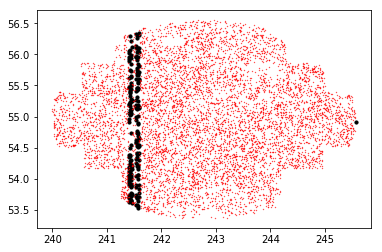

In [121]:
mask = np.array([name in lofar_mips_table['help_id'] for name in ids])
x = ras[~mask]
y = decs[~mask]
plt.scatter(x,y,s=10,c='black')

x = lofar_mips_table['RA']
y = lofar_mips_table['Dec']
plt.scatter(x,y,s=0.1,c='red')

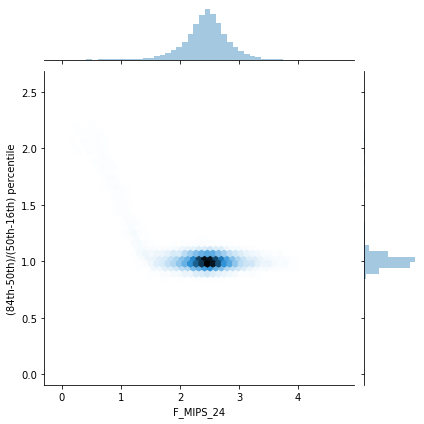

In [211]:
skew=(lofar_mips_table['FErr_MIPS_24_u']-lofar_mips_table['F_MIPS_24'])/(lofar_mips_table['F_MIPS_24']-lofar_mips_table['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_mips_table['F_MIPS_24']),y=skew, kind='hex')

skew=(lofar_orig['FErr_MIPS_24_u']-lofar_orig['F_MIPS_24'])/(lofar_orig['F_MIPS_24']-lofar_orig['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_MIPS_24']),y=skew, kind='hex')
plt.show()



In [212]:
lofar_mips_table.add_column(Column(np.zeros(len(data_rerun_table), dtype=bool),name='flag_MIPS_24'))



In [213]:
ind_SERVS_250=(lofar_mips_table['Pval_res_24']>0.5) | (lofar_mips_table['F_MIPS_24'] <20)
print(ind_SERVS_250.sum(),len(lofar_mips_table))

lofar_mips_table['flag_MIPS_24'][ind_SERVS_250]=True

1695 7529


In [214]:
rerun_col = Column(np.ones(len(lofar_mips_table)),name='XID+_rerun_mips',dtype='bool')
lofar_mips_table.add_column(rerun_col)

In [215]:
lofar_mips_table[0]

<Row index=0>
       help_id                 RA              Dec        F_MIPS_24 FErr_MIPS_24_u FErr_MIPS_24_l  Bkg_MIPS_24  Sig_conf_MIPS_24 Rhat_MIPS_24 n_eff_MIPS_24 Pval_res_24 flag_MIPS_24 XID+_rerun_mips
                            degrees          degrees         muJy        muJy           muJy         MJy / sr       MJy / sr                                                                        
       bytes27              float64          float64       float32     float32        float32        float32        float32        float32       float32      float32       bool           bool     
---------------------- ----------------- ---------------- --------- -------------- -------------- ------------- ---------------- ------------ ------------- ----------- ------------ ---------------
ILTJ155958.68+550534.6 239.9942929896559 55.0930282279941 205.18457        228.756      173.11113 -0.0048937183    5.1907605e-06    1.0001951     1720.3978         0.0        False            True

In [216]:
x = np.log10(lofar_orig['F_MIPS_24'])
y = (lofar_orig['FErr_MIPS_24_u']-lofar_orig['F_MIPS_24'])/(lofar_orig['F_MIPS_24']-lofar_orig['FErr_MIPS_24_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_mips_table['F_MIPS_24'])
y = (lofar_mips_table['FErr_MIPS_24_u']-lofar_mips_table['F_MIPS_24'])/(lofar_mips_table['F_MIPS_24']-lofar_mips_table['FErr_MIPS_24_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_250],y[ind_SERVS_250],s=1,c='black')
plt.xlabel('log mips flux (uJy)')
plt.ylabel('upper_error/lower_error')
plt.show()

### Plot mips sources

In [300]:
#read in mips image and create wcs
imfolder='../../../../../HELP/dmu_products/dmu17/dmu17_HELP_Legacy_maps/ELAIS-N1/data/'

pswfits=imfolder+'wp4_elais-n1_mips24_map_v1.0.fits.gz'#SPIRE 250 map

MIPS_Map = fits.open(pswfits)

#-----250-------------
hdulist = fits.open(pswfits)
im24phdu=hdulist[0].header
im24hdu=hdulist[1].header

im24=hdulist[1].data*1.0E3 #convert to mJy
nim24=hdulist[2].data*1.0E3 #convert to mJy
w_24 = wcs.WCS(hdulist[1].header)
hdulist.close()

In [301]:
fname = 'data/data_release/radio_image.fits'
hdulist = fits.open(fname)
radim_header = hdulist[0].header
radim_wcs = wcs.WCS(radim_header).celestial
radim_data = hdulist[0].data[0][0]
hdulist.close()

In [367]:
plot_params = {'marker':['o','+','s','v','X','d'],
              'col':['green','cyan','orange'],
              'size':100,
              'box_length':1/60,
              'use_redshift':[False,False,False,False]}

In [ ]:
y = (lofar_mips_table['FErr_MIPS_24_u']-lofar_mips_table['F_MIPS_24'])/(lofar_mips_table['F_MIPS_24']-lofar_mips_table['FErr_MIPS_24_l'])
mask = (lofar_mips_table['F_MIPS_24']>15) & (y>1.8)
ra = lofar_mips_table['RA'][mask]
dec = lofar_mips_table['Dec'][mask]

for n in range(len(ra)):
    image_plotting.plot_figure(im24,[mips_prior,lofar_mips_table,lofar_orig],w_24,ra[n],dec[n],plot_params,contour_data=[radim_data,radim_wcs])

## Check PACS results against HELP results

In [323]:
file_list = glob.glob('data/fir/PACS/*/lofar_xidplus*.pkl')

priors,posterior = xidplus.load(file_list[0])
PACS_cat=cat.create_PACS_cat(posterior,priors[0],priors[1])
lofar_pacs_table_all = Table.read(PACS_cat,memmap=False)

for i,filename in enumerate(file_list):
    #print(filename)
    if i%50==0:
        print(i)
    
    priors,posterior = xidplus.load(filename)
    PACS_cat=cat.create_PACS_cat(posterior,priors[0],priors[1])
    PACS_cat = Table.read(PACS_cat,memmap=False)
    lofar_pacs_table_all = vstack([lofar_pacs_table_all,PACS_cat])
    

data_rerun_table = lofar_pacs_table

0
50
100
150
200
250
300
350
400


In [324]:
joined_pacs = join(lofar_pacs_table_all,masterlist,join_type='inner',keys='help_id')

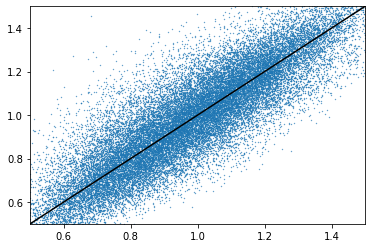

In [326]:
x = np.log10(joined_pacs['f_pacs_green'])-3
xerr = np.log10(joined_pacs['ferr_pacs_green'])-3
y = np.log10(joined_pacs['F_PACS_100'])
yerr_u = np.log10(joined_pacs['FErr_PACS_100_u'])
yerr_l = np.log10(joined_pacs['FErr_PACS_100_l'])

#plt.errorbar(x,y,xerr=xerr,yerr=[yerr_u,yerr_l])
plt.scatter(x,y,s=0.1)
plt.plot([0,2],[0,2],c='black')
plt.xlim(0.5,1.5)
plt.ylim(0.5,1.5)
plt.show()

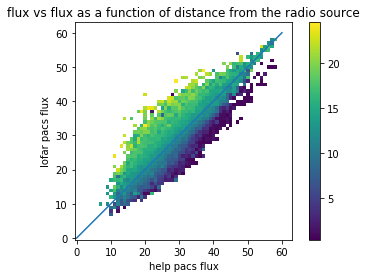

In [376]:
ra1 = lofar_pacs_table['RA'].data
dec1 = lofar_pacs_table['Dec'].data
c_lofar = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
ra1 = joined_pacs['ra'].data
dec1 = joined_pacs['dec'].data
c_help = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
idx, d2d, _ = c_help.match_to_catalog_3d(c_lofar)

col = d2d.value*3600

x = np.log10(joined_pacs['f_pacs_green'])-3
y = np.log10(joined_pacs['F_PACS_100'])

bins = np.linspace(0,2,60)
data_num,xbin,ybin = np.histogram2d(y,x,bins=bins)
data_y_avg,xbin,ybin = np.histogram2d(y,x,bins=bins,weights=col)
plt.imshow(data_y_avg/data_num)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.plot([0,60],[0,60])
plt.colorbar()
plt.xlabel('help pacs flux')
plt.ylabel('lofar pacs flux')
plt.title('flux vs flux as a function of distance from the radio source')
plt.show()

In [363]:
yerr_u = joined_pacs['FErr_PACS_100_u']-joined_pacs['F_PACS_100']
yerr_l = joined_pacs['F_PACS_100']-joined_pacs['FErr_PACS_100_l']

metric = joined_pacs['f_pacs_green']/1000 - joined_pacs['F_PACS_100']
err = (joined_pacs['ferr_pacs_green']/1000)**2 + ((yerr_u+yerr_l)/2)**2
np.sum((metric**2/err)>1)

69

In [364]:
#Table.write(lofar_pacs_table,'test.fits')
#Table.write(fir_table,'data/data_release/XID+_lofar_ELAIS-N1_v0.5_20200113.fits')
from astropy.io import registry
from astropy.table.info import serialize_method_as

with serialize_method_as(lofar_pacs_table, None):
            registry.write(lofar_pacs_table, 'data/fir/PACS/all_sources.fits',format='fits')

In [ ]:
plot_params = {'marker':['o','+','s','v','X','d'],
              'col':['green','cyan','orange'],
              'size':100,
              'box_length':1/60,
              'use_redshift':[False,False,False]}

In [ ]:
x = np.log10(joined['f_pacs_green'])
y = np.log10(joined['F_PACS_100'])
mask = (x-y)>1.5

mask = metric/err>1
ra = joined[mask]['ra']
dec = joined[mask]['dec']
ra = 244.01967769676352
dec = 55.61836714885293
image_plotting.plot_figure(im100,[mips_prior,lofar_mips_table,lofar_orig],w_100,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])

## Processing PACS output

In [328]:
file_list = glob.glob('data/fir/PACS/*/lofar_xidplus_fir*.fits')
#num_not = np.arange(428,860,1)

lofar_pacs_table = Table.read(file_list[0])
for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)
    
    #print(filename)
    new_table = Table.read(filename,memmap=False)
    if len(new_table)!=20:
        print(filename)
        print('length of table is: {}'.format(len(new_table)))

    lofar_pacs_table = vstack([lofar_pacs_table,new_table])
data_rerun_table = lofar_pacs_table

0
50
100
150
200
250
data/fir/PACS/xidplus_run_418/lofar_xidplus_fir_418_rerun.fits
length of table is: 10
300
data/fir/PACS/xidplus_run_157/lofar_xidplus_fir_157_rerun.fits
length of table is: 2
350
400


In [92]:
lofar_pacs_table[0]

<Row index=0>
       help_id                 RA               Dec        F_PACS_100 FErr_PACS_100_u FErr_PACS_100_l F_PACS_160 FErr_PACS_160_u FErr_PACS_160_l Bkg_PACS_100  Bkg_PACS_160 Sig_conf_PACS_100 Sig_conf_PACS_160 Rhat_PACS_100 Rhat_PACS_160 n_eff_PACS_100 n_eff_PACS_160 Pval_res_100 Pval_res_160
                            degrees           degrees         mJy           mJy             mJy          mJy           mJy             mJy         mJy/Beam      mJy/Beam        mJy/Beam          mJy/Beam                                                                                        
       bytes27              float64           float64       float32       float32         float32      float32       float32         float32       float32       float32         float32           float32         float32       float32       float32        float32       float32      float32   
---------------------- ----------------- ----------------- ---------- --------------- --------------- ---------- --------------- --------------- ------------ ------------- ----------------- ----------------- ------------- ------------- -------------- -------------- ------------ ------------
ILTJ160629.63+552842.8 241.6234625098448 55.47885494696244  5.7767463       12.689652       1.6353072  16.500471       31.542439        4.551211 0.0003700712 0.00028647913     1.5934671e-05     3.0291836e-05     0.9987284    0.99917406      2799.7183      1410.1663          0.0          0.0

In [93]:
len(lofar_pacs_table)

8352

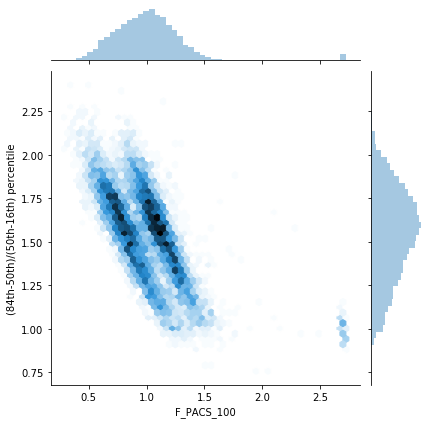

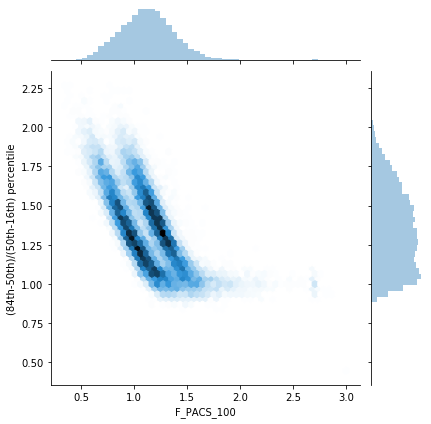

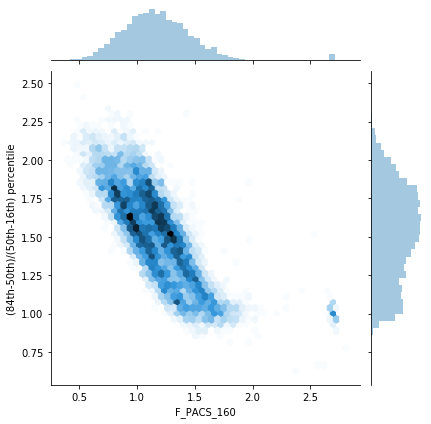

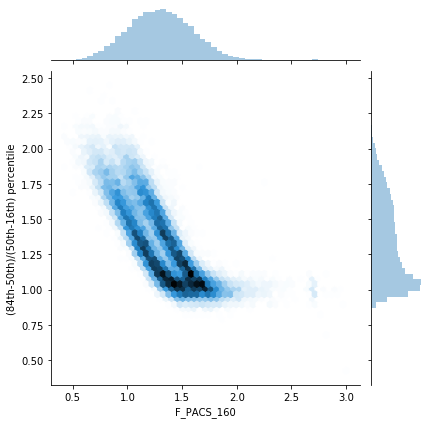

In [94]:
skew=(lofar_pacs_table['FErr_PACS_100_u']-lofar_pacs_table['F_PACS_100'])/(lofar_pacs_table['F_PACS_100']-lofar_pacs_table['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_pacs_table['F_PACS_100']),y=skew, kind='hex')

skew=(lofar_orig['FErr_PACS_100_u']-lofar_orig['F_PACS_100'])/(lofar_orig['F_PACS_100']-lofar_orig['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_PACS_100']),y=skew, kind='hex')

skew=(lofar_pacs_table['FErr_PACS_160_u']-lofar_pacs_table['F_PACS_160'])/(lofar_pacs_table['F_PACS_160']-lofar_pacs_table['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_pacs_table['F_PACS_160']),y=skew, kind='hex')

skew=(lofar_orig['FErr_PACS_160_u']-lofar_orig['F_PACS_160'])/(lofar_orig['F_PACS_160']-lofar_orig['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_PACS_160']),y=skew, kind='hex')

In [95]:
lofar_pacs_table.add_column(Column(np.zeros(len(lofar_pacs_table), dtype=bool),name='flag_PACS_100'))
lofar_pacs_table.add_column(Column(np.zeros(len(lofar_pacs_table), dtype=bool),name='flag_PACS_160'))

In [96]:
ind_SERVS_100=(lofar_pacs_table['Pval_res_100']>0.5) | (lofar_pacs_table['F_PACS_100'] < 12.5)
ind_SERVS_160=(lofar_pacs_table['Pval_res_160']>0.5) | (lofar_pacs_table['F_PACS_160'] < 17.5)
print(ind_SERVS_100.sum(),ind_SERVS_160.sum(),len(lofar_pacs_table))

lofar_pacs_table['flag_PACS_100'][ind_SERVS_100]=True
lofar_pacs_table['flag_PACS_160'][ind_SERVS_160]=True

5573 5195 8352


In [97]:
rerun_col = Column(np.ones(len(lofar_pacs_table)),name='XID+_rerun_pacs',dtype='bool')
lofar_pacs_table.add_column(rerun_col)

In [98]:
lofar_pacs_table[0]

<Row index=0>
       help_id                 RA               Dec        F_PACS_100 FErr_PACS_100_u FErr_PACS_100_l F_PACS_160 FErr_PACS_160_u FErr_PACS_160_l Bkg_PACS_100  Bkg_PACS_160 Sig_conf_PACS_100 Sig_conf_PACS_160 Rhat_PACS_100 Rhat_PACS_160 n_eff_PACS_100 n_eff_PACS_160 Pval_res_100 Pval_res_160 flag_PACS_100 flag_PACS_160 XID+_rerun_pacs
                            degrees           degrees         mJy           mJy             mJy          mJy           mJy             mJy         mJy/Beam      mJy/Beam        mJy/Beam          mJy/Beam                                                                                                                                    
       bytes27              float64           float64       float32       float32         float32      float32       float32         float32       float32       float32         float32           float32         float32       float32       float32        float32       float32      float32         bool          bool           bool     
---------------------- ----------------- ----------------- ---------- --------------- --------------- ---------- --------------- --------------- ------------ ------------- ----------------- ----------------- ------------- ------------- -------------- -------------- ------------ ------------ ------------- ------------- ---------------
ILTJ160629.63+552842.8 241.6234625098448 55.47885494696244  5.7767463       12.689652       1.6353072  16.500471       31.542439        4.551211 0.0003700712 0.00028647913     1.5934671e-05     3.0291836e-05     0.9987284    0.99917406      2799.7183      1410.1663          0.0          0.0          True          True            True

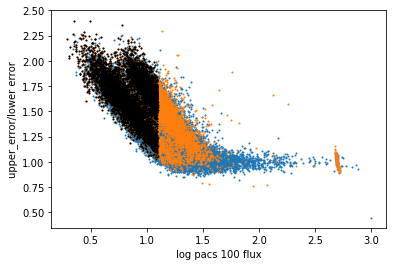

In [99]:
x = np.log10(lofar_orig['F_PACS_100'])
y = (lofar_orig['FErr_PACS_100_u']-lofar_orig['F_PACS_100'])/(lofar_orig['F_PACS_100']-lofar_orig['FErr_PACS_100_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_pacs_table['F_PACS_100'])
y = (lofar_pacs_table['FErr_PACS_100_u']-lofar_pacs_table['F_PACS_100'])/(lofar_pacs_table['F_PACS_100']-lofar_pacs_table['FErr_PACS_100_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_100],y[ind_SERVS_100],s=1,c='black')
plt.xlabel('log pacs 100 flux')
plt.ylabel('upper_error/lower error')
plt.show()

x = np.log10(lofar_orig['F_PACS_160'])
y = (lofar_orig['FErr_PACS_160_u']-lofar_orig['F_PACS_160'])/(lofar_orig['F_PACS_160']-lofar_orig['FErr_PACS_160_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_pacs_table['F_PACS_160'])
y = (lofar_pacs_table['FErr_PACS_160_u']-lofar_pacs_table['F_PACS_160'])/(lofar_pacs_table['F_PACS_160']-lofar_pacs_table['FErr_PACS_160_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_160],y[ind_SERVS_160],s=1,c='black')
plt.xlabel('log pacs 160 flux')
plt.ylabel('upper_error/lower error')
plt.show()

## Plot the PACS sources

In [ ]:
imfolder='../../../../../HELP/dmu_products/dmu18/dmu18_ELAIS-N1/data/'

im100fits=imfolder + 'ELAIS-N1-100um-img_wgls.fits'#PACS 100 map
nim100fits=imfolder + 'ELAIS-N1-100um-img_noise.fits'#PACS 100 noise map

hdulist = fits.open(im100fits)
im100phdu=hdulist[0].header
im100hdu=hdulist[0].header
im100=hdulist[0].data
w_100 = wcs.WCS(hdulist[0].header)
pixsize100=3600.0*np.abs(hdulist[0].header['CDELT1']) #pixel size (in arcseconds)
hdulist.close()

hdulist = fits.open(nim100fits)
nim100=hdulist[0].data
hdulist.close()

In [ ]:
plot_params = {'marker':['o','+','s','v','X','d'],
              'col':['green','cyan','orange'],
              'size':100,
              'box_length':1/60,
              'use_redshift':[False,False,False]}

In [ ]:
#mask = lofar_pacs_table['F_PACS_100']>10**0.9
#ra = lofar_pacs_table['RA'][mask][3]
#dec = lofar_pacs_table['Dec'][mask][3]

ra = 244.01967769676352
dec = 55.61836714885293
image_plotting.plot_figure(im100,[mips_prior,lofar_mips_table,lofar_orig],w_100,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])

## Check that the SPIRE output matches the HELP results

In [332]:
file_list = glob.glob('data/fir/SPIRE/*/lofar_xidplus*.pkl')

priors,posterior = xidplus.load(file_list[0])
SPIRE_cat=cat.create_SPIRE_cat(posterior,priors[0],priors[1],priors[2])
lofar_spire_table_all = Table.read(SPIRE_cat,memmap=False)

for i,filename in enumerate(file_list):
    #print(filename)
    if i%50==0:
        print(i)
    
    priors,posterior = xidplus.load(filename)
    SPIRE_cat=cat.create_SPIRE_cat(posterior,priors[0],priors[1],priors[2])
    SPIRE_cat = Table.read(SPIRE_cat,memmap=False)
    lofar_spire_table_all = vstack([lofar_spire_table_all,SPIRE_cat])
    
lofar_spire_table.rename_column('HELP_ID','help_id')

0
50
100
150
200
250
300
350
400


In [342]:
lofar_spire_table_all[0]

<Row index=0>
          help_id                   RA                Dec        F_SPIRE_250 FErr_SPIRE_250_u FErr_SPIRE_250_l F_SPIRE_350 FErr_SPIRE_350_u FErr_SPIRE_350_l F_SPIRE_500 FErr_SPIRE_500_u FErr_SPIRE_500_l Bkg_SPIRE_250 Bkg_SPIRE_350 Bkg_SPIRE_500 Sig_conf_SPIRE_250 Sig_conf_SPIRE_350 Sig_conf_SPIRE_500 Rhat_SPIRE_250 Rhat_SPIRE_350 Rhat_SPIRE_500 n_eff_SPIRE_250 n_eff_SPIRE_500 n_eff_SPIRE_350 Pval_res_250 Pval_res_350 Pval_res_500
                                 degrees            degrees          mJy           mJy              mJy            mJy           mJy              mJy            mJy           mJy              mJy           mJy/Beam      mJy/Beam      mJy/Beam        mJy/Beam           mJy/Beam           mJy/Beam                                                                                                                                         
           str27                 float64            float64        float32       float32          float32        float32       float32          float32        float32       float32          float32         float32       float32       float32         float32            float32            float32          float32        float32        float32         float32         float32         float32       float32      float32      float32   
--------------------------- ------------------ ----------------- ----------- ---------------- ---------------- ----------- ---------------- ---------------- ----------- ---------------- ---------------- ------------- ------------- ------------- ------------------ ------------------ ------------------ -------------- -------------- -------------- --------------- --------------- --------------- ------------ ------------ ------------
HELP_J160622.877+552824.139 241.59531998838338 55.47337189137035   13.448089        18.045235         8.429757   2.8847046         6.407296        0.8095098   1.7780082        4.3078294        0.4394585     -5.376118      -8.13945     -14.33662           1.713389          1.9629346          2.8974302      1.0012566     0.99867404     0.99958724         1790.53       2724.2168       2766.6233          0.0        0.009        0.024

In [337]:
joined_spire = join(lofar_spire_table_all,masterlist,join_type='inner',keys='help_id')

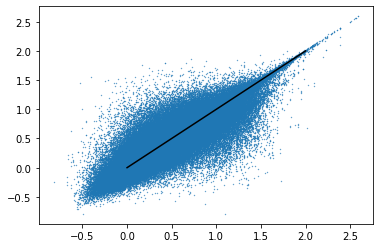

In [351]:
x = np.log10(joined_spire['f_spire_250'])-3
xerr = np.log10(joined_spire['ferr_spire_250'])-3
y = np.log10(joined_spire['F_SPIRE_250'])
yerr_u = np.log10(joined_spire['FErr_SPIRE_250_u'])
yerr_l = np.log10(joined_spire['FErr_SPIRE_250_l'])

#plt.errorbar(x,y,xerr=xerr,yerr=[yerr_u,yerr_l])
plt.scatter(x,y,s=0.1)
plt.plot([0,2],[0,2],c='black')
#plt.xlim(0.5,1.5)
#plt.ylim(0.5,1.5)
plt.show()

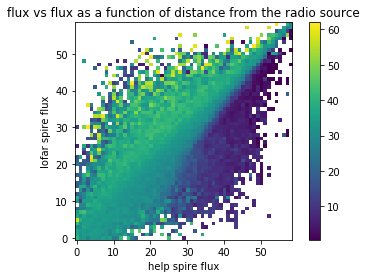

In [377]:
ra1 = lofar_spire_table['RA'].data
dec1 = lofar_spire_table['Dec'].data
c_lofar = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
ra1 = joined_spire['ra'].data
dec1 = joined_spire['dec'].data
c_help = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
idx, d2d, _ = c_help.match_to_catalog_3d(c_lofar)

col = d2d.value*3600

x = np.log10(joined_spire['f_spire_250'])-3
y = np.log10(joined_spire['F_SPIRE_250'])

bins = np.linspace(-0.5,2,60)
data_num,xbin,ybin = np.histogram2d(y,x,bins=bins)
data_y_avg,xbin,ybin = np.histogram2d(y,x,bins=bins,weights=col)
plt.imshow(data_y_avg/data_num)
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
#plt.plot([0,60],[0,60])
plt.colorbar()
plt.xlabel('help spire flux')
plt.ylabel('lofar spire flux')
plt.title('flux vs flux as a function of distance from the radio source')
plt.show()

In [361]:
yerr_u = joined_spire['FErr_SPIRE_250_u']-joined_spire['F_SPIRE_250']
yerr_l = joined_spire['F_SPIRE_250']-joined_spire['FErr_SPIRE_250_l']

metric = joined_spire['f_spire_250']/1000 - joined_spire['F_SPIRE_250']
err = (joined_spire['ferr_spire_250']/1000)**2 + ((yerr_u+yerr_l)/2)**2
np.sum((metric**2/err)>1)

22359

In [366]:
#Table.write(lofar_pacs_table,'test.fits')
#Table.write(fir_table,'data/data_release/XID+_lofar_ELAIS-N1_v0.5_20200113.fits')
from astropy.io import registry
from astropy.table.info import serialize_method_as

with serialize_method_as(lofar_spire_table_all, None):
            registry.write(lofar_spire_table_all, 'data/fir/SPIRE/all_sources.fits',format='fits')

## Processing SPIRE output

In [22]:
file_list = glob.glob('data/fir/SPIRE/*/lofar_xidplus_fir*.fits')
num_not = np.arange(428,860,1)

lofar_spire_table = Table.read(file_list[0])
for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)
    
    run_num = 0
    try:
        run_num = int(filename[24:27])
    except:
        run_num = 0
    #print(run_num)
    if run_num>428:
        continue
    
    #print(filename)
    new_table = Table.read(filename,memmap=False)
    if len(new_table)!=20:
        print(filename)
        print('length of table is: {}'.format(len(new_table)))
    lofar_spire_table = vstack([lofar_spire_table,new_table])
data_rerun_table = lofar_spire_table

0


In [49]:
lofar = Table.read('data/data_release/final_cross_match_catalogue-v0.5.fits')
mask = (~np.isnan(lofar['F_SPIRE_250'])) | (~np.isnan(lofar['F_SPIRE_350'])) | (~np.isnan(lofar['F_SPIRE_500']))
lofar = lofar[~mask]

In [65]:
file_list = glob.glob('data/fir/SPIRE/*/lofar_xidplus*.pkl')

name = file_list[0]
taskid = int(name.split('/')[3][12:])
batch_size = 20

ind_low = taskid*batch_size
if taskid*batch_size+batch_size>len(lofar):
    ind_up = len(lofar)
else:
    ind_up = taskid*batch_size+batch_size
ras = lofar['optRA'][ind_low:ind_up]
mask = np.isnan(ras)
ras[mask] = lofar['RA'][ind_low:ind_up][mask]

decs = lofar['optDec'][ind_low:ind_up]
mask = np.isnan(decs)
decs[mask] = lofar['DEC'][ind_low:ind_up][mask]

ids = lofar['Source_Name'][ind_low:ind_up]

name = file_list[0]
taskid = name.split('/')[3][12:]

priors,posterior = xidplus.load(file_list[0])
SPIRE_cat=cat.create_SPIRE_cat(posterior,priors[0],priors[1],priors[2])
SPIRE_cat = Table.read(SPIRE_cat)
mask = [SPIRE_cat['HELP_ID'][i] in ids for i in range(len(SPIRE_cat))]
lofar_spire_table = SPIRE_cat[mask]

for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(len(lofar_spire_table))
        print(i)
    
    #print (filename,filename.split('/')[3][12:])
    taskid = int(filename.split('/')[3][12:])
    batch_size = 20

    ind_low = taskid*batch_size
    if taskid*batch_size+batch_size>len(lofar):
        ind_up = len(lofar)
    else:
        ind_up = taskid*batch_size+batch_size
    ras = lofar['optRA'][ind_low:ind_up]
    mask = np.isnan(ras)
    ras[mask] = lofar['RA'][ind_low:ind_up][mask]

    decs = lofar['optDec'][ind_low:ind_up]
    mask = np.isnan(decs)
    decs[mask] = lofar['DEC'][ind_low:ind_up][mask]

    ids = lofar['Source_Name'][ind_low:ind_up]
    
    priors,posterior = xidplus.load(filename)
    SPIRE_cat=cat.create_SPIRE_cat(posterior,priors[0],priors[1],priors[2])
    SPIRE_cat = Table.read(SPIRE_cat,memmap=False)
    mask = [SPIRE_cat['HELP_ID'][i] in ids for i in range(len(SPIRE_cat))]
    lofar_spire_table = vstack([lofar_spire_table,SPIRE_cat[mask]])
    

data_rerun_table = lofar_spire_table


20
0
1020
50
2020
100
3020
150
4020
200
5020
250
6010
300
7010
350
8010
400


In [66]:
lofar_spire_table[0]

<Row index=0>
       HELP_ID                 RA               Dec        F_SPIRE_250 FErr_SPIRE_250_u FErr_SPIRE_250_l F_SPIRE_350 FErr_SPIRE_350_u FErr_SPIRE_350_l F_SPIRE_500 FErr_SPIRE_500_u FErr_SPIRE_500_l Bkg_SPIRE_250 Bkg_SPIRE_350 Bkg_SPIRE_500 Sig_conf_SPIRE_250 Sig_conf_SPIRE_350 Sig_conf_SPIRE_500 Rhat_SPIRE_250 Rhat_SPIRE_350 Rhat_SPIRE_500 n_eff_SPIRE_250 n_eff_SPIRE_500 n_eff_SPIRE_350 Pval_res_250 Pval_res_350 Pval_res_500
                            degrees           degrees          mJy           mJy              mJy            mJy           mJy              mJy            mJy           mJy              mJy           mJy/Beam      mJy/Beam      mJy/Beam        mJy/Beam           mJy/Beam           mJy/Beam                                                                                                                                         
        str27               float64           float64        float32       float32          float32        float32       float32          float32        float32       float32          float32         float32       float32       float32         float32            float32            float32          float32        float32        float32         float32         float32         float32       float32      float32      float32   
---------------------- ----------------- ----------------- ----------- ---------------- ---------------- ----------- ---------------- ---------------- ----------- ---------------- ---------------- ------------- ------------- ------------- ------------------ ------------------ ------------------ -------------- -------------- -------------- --------------- --------------- --------------- ------------ ------------ ------------
ILTJ160629.63+552842.8 241.6234625098448 55.47885494696244    3.058834          6.13831       0.95957315   4.1623282         8.294993        1.2266676   2.5460012        5.8819714       0.73941785     -5.376118      -8.13945     -14.33662           1.713389          1.9629346          2.8974302     0.99883264      1.0001123      0.9983209       2124.4685       2358.0835       1549.6259          0.0          0.0        0.001

In [67]:
len(lofar_spire_table)

8370

In [30]:
file_list

['data/fir/SPIRE/xidplus_run_0/lofar_xidplus_fir_0_rerun.fits',
 'data/fir/SPIRE/xidplus_run_1/lofar_xidplus_fir_1_rerun.fits',
 'data/fir/SPIRE/xidplus_run_10/lofar_xidplus_fir_10_rerun.fits',
 'data/fir/SPIRE/xidplus_run_11/lofar_xidplus_fir_11_rerun.fits',
 'data/fir/SPIRE/xidplus_run_12/lofar_xidplus_fir_12_rerun.fits',
 'data/fir/SPIRE/xidplus_run_13/lofar_xidplus_fir_13_rerun.fits',
 'data/fir/SPIRE/xidplus_run_14/lofar_xidplus_fir_14_rerun.fits',
 'data/fir/SPIRE/xidplus_run_15/lofar_xidplus_fir_15_rerun.fits',
 'data/fir/SPIRE/xidplus_run_16/lofar_xidplus_fir_16_rerun.fits',
 'data/fir/SPIRE/xidplus_run_17/lofar_xidplus_fir_17_rerun.fits',
 'data/fir/SPIRE/xidplus_run_18/lofar_xidplus_fir_18_rerun.fits',
 'data/fir/SPIRE/xidplus_run_2/lofar_xidplus_fir_2_rerun.fits',
 'data/fir/SPIRE/xidplus_run_3/lofar_xidplus_fir_3_rerun.fits',
 'data/fir/SPIRE/xidplus_run_4/lofar_xidplus_fir_4_rerun.fits',
 'data/fir/SPIRE/xidplus_run_5/lofar_xidplus_fir_5_rerun.fits',
 'data/fir/SPIRE/xidpl

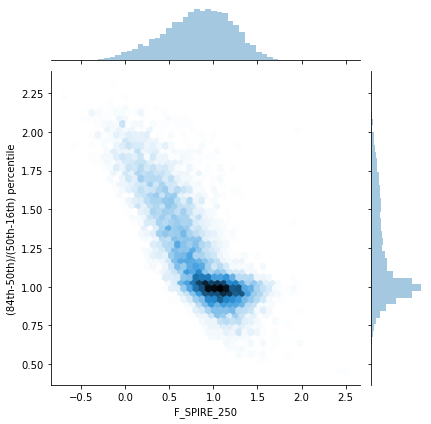

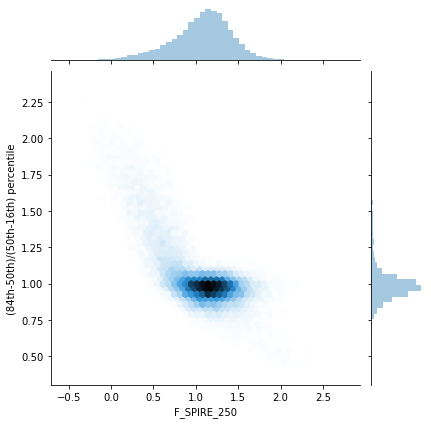

In [68]:
skew=(lofar_spire_table['FErr_SPIRE_250_u']-lofar_spire_table['F_SPIRE_250'])/(lofar_spire_table['F_SPIRE_250']-lofar_spire_table['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_spire_table['F_SPIRE_250']),y=skew, kind='hex')

skew=(lofar_orig['FErr_SPIRE_250_u']-lofar_orig['F_SPIRE_250'])/(lofar_orig['F_SPIRE_250']-lofar_orig['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_SPIRE_250']),y=skew, kind='hex')


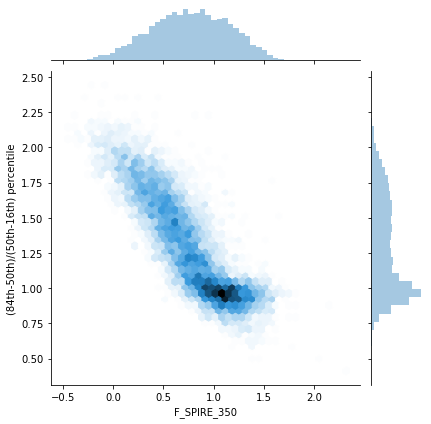

In [69]:
skew=(lofar_spire_table['FErr_SPIRE_350_u']-lofar_spire_table['F_SPIRE_350'])/(lofar_spire_table['F_SPIRE_350']-lofar_spire_table['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_spire_table['F_SPIRE_350']),y=skew, kind='hex')

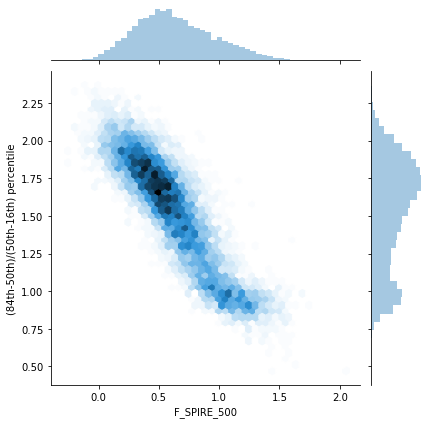

In [70]:
skew=(lofar_spire_table['FErr_SPIRE_500_u']-lofar_spire_table['F_SPIRE_500'])/(lofar_spire_table['F_SPIRE_500']-lofar_spire_table['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_spire_table['F_SPIRE_500']),y=skew, kind='hex')

In [71]:
lofar_spire_table.add_column(Column(np.zeros(len(lofar_spire_table), dtype=bool),name='flag_SPIRE_250'))
lofar_spire_table.add_column(Column(np.zeros(len(lofar_spire_table), dtype=bool),name='flag_SPIRE_350'))
lofar_spire_table.add_column(Column(np.zeros(len(lofar_spire_table), dtype=bool),name='flag_SPIRE_500'))

In [72]:
ind_SERVS_250=(lofar_spire_table['Pval_res_250']>0.5) | (lofar_spire_table['F_SPIRE_250'] < 4)
ind_SERVS_350=(lofar_spire_table['Pval_res_350']>0.5) | (lofar_spire_table['F_SPIRE_350'] < 4)
ind_SERVS_500=(lofar_spire_table['Pval_res_500']>0.5) | (lofar_spire_table['F_SPIRE_500'] < 4)

print(ind_SERVS_250.sum(),ind_SERVS_350.sum(),ind_SERVS_500.sum(),len(lofar_spire_table))

lofar_spire_table['flag_SPIRE_250'][ind_SERVS_250]=True
lofar_spire_table['flag_SPIRE_350'][ind_SERVS_350]=True
lofar_spire_table['flag_SPIRE_500'][ind_SERVS_500]=True

2560 3088 4517 8370


In [73]:
rerun_col = Column(np.ones(len(lofar_spire_table)),name='XID+_rerun_SPIRE',dtype='bool')
lofar_spire_table.add_column(rerun_col)

In [74]:
lofar_spire_table.rename_column('HELP_ID','help_id')

In [75]:
lofar_spire_table[0]

<Row index=0>
       help_id                 RA               Dec        F_SPIRE_250 FErr_SPIRE_250_u FErr_SPIRE_250_l F_SPIRE_350 FErr_SPIRE_350_u FErr_SPIRE_350_l F_SPIRE_500 FErr_SPIRE_500_u FErr_SPIRE_500_l Bkg_SPIRE_250 Bkg_SPIRE_350 Bkg_SPIRE_500 Sig_conf_SPIRE_250 Sig_conf_SPIRE_350 Sig_conf_SPIRE_500 Rhat_SPIRE_250 Rhat_SPIRE_350 Rhat_SPIRE_500 n_eff_SPIRE_250 n_eff_SPIRE_500 n_eff_SPIRE_350 Pval_res_250 Pval_res_350 Pval_res_500 flag_SPIRE_250 flag_SPIRE_350 flag_SPIRE_500 XID+_rerun_SPIRE
                            degrees           degrees          mJy           mJy              mJy            mJy           mJy              mJy            mJy           mJy              mJy           mJy/Beam      mJy/Beam      mJy/Beam        mJy/Beam           mJy/Beam           mJy/Beam                                                                                                                                                                                                       
        str27               float64           float64        float32       float32          float32        float32       float32          float32        float32       float32          float32         float32       float32       float32         float32            float32            float32          float32        float32        float32         float32         float32         float32       float32      float32      float32         bool           bool           bool            bool      
---------------------- ----------------- ----------------- ----------- ---------------- ---------------- ----------- ---------------- ---------------- ----------- ---------------- ---------------- ------------- ------------- ------------- ------------------ ------------------ ------------------ -------------- -------------- -------------- --------------- --------------- --------------- ------------ ------------ ------------ -------------- -------------- -------------- ----------------
ILTJ160629.63+552842.8 241.6234625098448 55.47885494696244    3.058834          6.13831       0.95957315   4.1623282         8.294993        1.2266676   2.5460012        5.8819714       0.73941785     -5.376118      -8.13945     -14.33662           1.713389          1.9629346          2.8974302     0.99883264      1.0001123      0.9983209       2124.4685       2358.0835       1549.6259          0.0          0.0        0.001           True          False           True             True

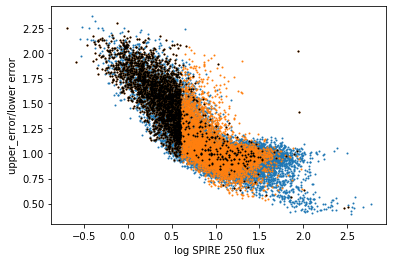

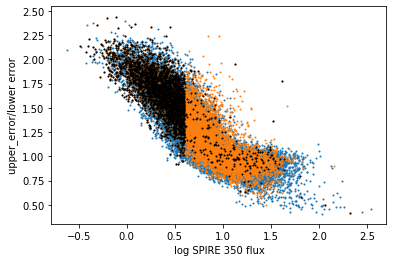

In [80]:
x = np.log10(lofar_orig['F_SPIRE_250'])
y = (lofar_orig['FErr_SPIRE_250_u']-lofar_orig['F_SPIRE_250'])/(lofar_orig['F_SPIRE_250']-lofar_orig['FErr_SPIRE_250_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_spire_table['F_SPIRE_250'])
y = (lofar_spire_table['FErr_SPIRE_250_u']-lofar_spire_table['F_SPIRE_250'])/(lofar_spire_table['F_SPIRE_250']-lofar_spire_table['FErr_SPIRE_250_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_250],y[ind_SERVS_250],s=1,c='black')
plt.xlabel('log SPIRE 250 flux')
plt.ylabel('upper_error/lower error')
plt.show()

x = np.log10(lofar_orig['F_SPIRE_350'])
y = (lofar_orig['FErr_SPIRE_350_u']-lofar_orig['F_SPIRE_350'])/(lofar_orig['F_SPIRE_350']-lofar_orig['FErr_SPIRE_350_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_spire_table['F_SPIRE_350'])
y = (lofar_spire_table['FErr_SPIRE_350_u']-lofar_spire_table['F_SPIRE_350'])/(lofar_spire_table['F_SPIRE_350']-lofar_spire_table['FErr_SPIRE_350_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_350],y[ind_SERVS_350],s=1,c='black')
plt.xlabel('log SPIRE 350 flux')
plt.ylabel('upper_error/lower error')
plt.show()

x = np.log10(lofar_orig['F_SPIRE_500'])
y = (lofar_orig['FErr_SPIRE_500_u']-lofar_orig['F_SPIRE_500'])/(lofar_orig['F_SPIRE_500']-lofar_orig['FErr_SPIRE_500_l'])
plt.scatter(x,y,s=1)

x = np.log10(lofar_spire_table['F_SPIRE_500'])
y = (lofar_spire_table['FErr_SPIRE_500_u']-lofar_spire_table['F_SPIRE_500'])/(lofar_spire_table['F_SPIRE_500']-lofar_spire_table['FErr_SPIRE_500_l'])
plt.scatter(x,y,s=1)

plt.scatter(x[ind_SERVS_500],y[ind_SERVS_500],s=1,c='black')
plt.xlabel('log SPIRE 500 flux')
plt.ylabel('upper_error/lower error')
plt.show()

## Plot SPIRE Sources

In [ ]:
imfolder='../../../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/'
pswfits=imfolder+'ELAIS-N1_SPIRE250_v1.0.fits'
hdulist = fits.open(pswfits)
im250phdu=hdulist[0].header
im250hdu=hdulist['image'].header

im250=hdulist['image'].data*1.0E3 #convert to mJy
w_250 = wcs.WCS(hdulist['image'].header)
hdulist.close()

imfolder='../../../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/'
pswfits=imfolder+'ELAIS-N1_SPIRE350_v1.0.fits'
hdulist = fits.open(pswfits)
im350phdu=hdulist[0].header
im350hdu=hdulist['image'].header

im350=hdulist['image'].data*1.0E3 #convert to mJy
w_350 = wcs.WCS(hdulist['image'].header)
hdulist.close()

imfolder='../../../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/'
pswfits=imfolder+'ELAIS-N1_SPIRE500_v1.0.fits'
hdulist = fits.open(pswfits)
im500phdu=hdulist[0].header
im500hdu=hdulist['image'].header

im500=hdulist['image'].data*1.0E3 #convert to mJy
w_500 = wcs.WCS(hdulist['image'].header)
hdulist.close()

In [ ]:
plot_params = {'marker':['o','+','s','v','X','d'],
              'col':['green','cyan','orange'],
              'size':100,
              'box_length':1/60,
              'use_redshift':[False,False,False]}

In [ ]:
ra = 244.01967769676352
dec = 55.61836714885293
image_plotting.plot_figure(im250,[pacs_prior,lofar_spire_table,lofar_orig],w_250,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])
image_plotting.plot_figure(im350,[pacs_prior,lofar_spire_table,lofar_orig],w_350,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])
image_plotting.plot_figure(im500,[pacs_prior,lofar_spire_table,lofar_orig],w_500,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])

## Merge the MIPS, PACS and SPIRE catalogues

In [217]:
MIPS_x_PACS = join(lofar_mips_table,lofar_pacs_table,keys='help_id',join_type='outer')
fir_table = join(MIPS_x_PACS,lofar_spire_table,keys='help_id',join_type='outer')

In [218]:
'''for name in fir_table.colnames:
    
    if ('RA' in name) or ('Dec' in name):
        print(name)
        fir_table.remove_column(name)'''
fir_table.remove_columns(['RA','RA_2','Dec','Dec_2'])        
fir_table.rename_column('help_id','Source_Name')
fir_table.rename_column('RA_1','RA')
fir_table.rename_column('Dec_1','Dec')

In [219]:
fir_table[0]

<Row index=0>
     Source_Name               RA              Dec        F_MIPS_24 FErr_MIPS_24_u FErr_MIPS_24_l  Bkg_MIPS_24  Sig_conf_MIPS_24 Rhat_MIPS_24 n_eff_MIPS_24 Pval_res_24 flag_MIPS_24 XID+_rerun_mips F_PACS_100 FErr_PACS_100_u FErr_PACS_100_l F_PACS_160 FErr_PACS_160_u FErr_PACS_160_l  Bkg_PACS_100   Bkg_PACS_160  Sig_conf_PACS_100 Sig_conf_PACS_160 Rhat_PACS_100 Rhat_PACS_160 n_eff_PACS_100 n_eff_PACS_160 Pval_res_100 Pval_res_160 flag_PACS_100 flag_PACS_160 XID+_rerun_pacs F_SPIRE_250 FErr_SPIRE_250_u FErr_SPIRE_250_l F_SPIRE_350 FErr_SPIRE_350_u FErr_SPIRE_350_l F_SPIRE_500 FErr_SPIRE_500_u FErr_SPIRE_500_l Bkg_SPIRE_250 Bkg_SPIRE_350 Bkg_SPIRE_500 Sig_conf_SPIRE_250 Sig_conf_SPIRE_350 Sig_conf_SPIRE_500 Rhat_SPIRE_250 Rhat_SPIRE_350 Rhat_SPIRE_500 n_eff_SPIRE_250 n_eff_SPIRE_500 n_eff_SPIRE_350 Pval_res_250 Pval_res_350 Pval_res_500 flag_SPIRE_250 flag_SPIRE_350 flag_SPIRE_500 XID+_rerun_SPIRE
                            degrees          degrees         muJy        muJy           muJy         MJy / sr       MJy / sr                                                                            mJy           mJy             mJy          mJy           mJy             mJy          mJy/Beam       mJy/Beam         mJy/Beam          mJy/Beam                                                                                                                                         mJy           mJy              mJy            mJy           mJy              mJy            mJy           mJy              mJy           mJy/Beam      mJy/Beam      mJy/Beam        mJy/Beam           mJy/Beam           mJy/Beam                                                                                                                                                                                                       
        str27               float64          float64       float32     float32        float32        float32        float32        float32       float32      float32       bool           bool       float32       float32         float32      float32       float32         float32        float32        float32          float32           float32         float32       float32       float32        float32       float32      float32         bool          bool           bool        float32       float32          float32        float32       float32          float32        float32       float32          float32         float32       float32       float32         float32            float32            float32          float32        float32        float32         float32         float32         float32       float32      float32      float32         bool           bool           bool            bool      
---------------------- ----------------- ---------------- --------- -------------- -------------- ------------- ---------------- ------------ ------------- ----------- ------------ --------------- ---------- --------------- --------------- ---------- --------------- --------------- ------------- --------------- ----------------- ----------------- ------------- ------------- -------------- -------------- ------------ ------------ ------------- ------------- --------------- ----------- ---------------- ---------------- ----------- ---------------- ---------------- ----------- ---------------- ---------------- ------------- ------------- ------------- ------------------ ------------------ ------------------ -------------- -------------- -------------- --------------- --------------- --------------- ------------ ------------ ------------ -------------- -------------- -------------- ----------------
ILTJ155958.68+550534.6 239.9942929896559 55.0930282279941 205.18457        228.756      173.11113 -0.0048937183    5.1907605e-06    1.0001951     1720.3978         0.0        False            True  13.686264        29.31476       3.9415781   28.06837       54.981026        7.879433 0.00039258535 -0.000111965506      2.447301e-05     4.2142652e-05     0

In [220]:
fir_table_v01 = fir_table.copy()

In [221]:
all_fir_table = join(fir_table,fir_table_v01,join_type='outer',keys='Source_Name')

In [222]:
mask = [ids in lofar_orig['Source_Name'] for ids in all_fir_table['Source_Name']]
new_fir_table = all_fir_table[mask]

In [223]:
new_fir_table[0]

<Row index=0>
     Source_Name              RA_1            Dec_1       F_MIPS_24_1 FErr_MIPS_24_u_1 FErr_MIPS_24_l_1 Bkg_MIPS_24_1 Sig_conf_MIPS_24_1 Rhat_MIPS_24_1 n_eff_MIPS_24_1 Pval_res_24_1 flag_MIPS_24_1 XID+_rerun_mips_1 F_PACS_100_1 FErr_PACS_100_u_1 FErr_PACS_100_l_1 F_PACS_160_1 FErr_PACS_160_u_1 FErr_PACS_160_l_1 Bkg_PACS_100_1  Bkg_PACS_160_1 Sig_conf_PACS_100_1 Sig_conf_PACS_160_1 Rhat_PACS_100_1 Rhat_PACS_160_1 n_eff_PACS_100_1 n_eff_PACS_160_1 Pval_res_100_1 Pval_res_160_1 flag_PACS_100_1 flag_PACS_160_1 XID+_rerun_pacs_1 F_SPIRE_250_1 FErr_SPIRE_250_u_1 FErr_SPIRE_250_l_1 F_SPIRE_350_1 FErr_SPIRE_350_u_1 FErr_SPIRE_350_l_1 F_SPIRE_500_1 FErr_SPIRE_500_u_1 FErr_SPIRE_500_l_1 Bkg_SPIRE_250_1 Bkg_SPIRE_350_1 Bkg_SPIRE_500_1 Sig_conf_SPIRE_250_1 Sig_conf_SPIRE_350_1 Sig_conf_SPIRE_500_1 Rhat_SPIRE_250_1 Rhat_SPIRE_350_1 Rhat_SPIRE_500_1 n_eff_SPIRE_250_1 n_eff_SPIRE_500_1 n_eff_SPIRE_350_1 Pval_res_250_1 Pval_res_350_1 Pval_res_500_1 flag_SPIRE_250_1 flag_SPIRE_350_1 flag_SPIRE_500_1 XID+_rerun_SPIRE_1        RA_2            Dec_2       F_MIPS_24_2 FErr_MIPS_24_u_2 FErr_MIPS_24_l_2 Bkg_MIPS_24_2 Sig_conf_MIPS_24_2 Rhat_MIPS_24_2 n_eff_MIPS_24_2 Pval_res_24_2 flag_MIPS_24_2 XID+_rerun_mips_2 F_PACS_100_2 FErr_PACS_100_u_2 FErr_PACS_100_l_2 F_PACS_160_2 FErr_PACS_160_u_2 FErr_PACS_160_l_2 Bkg_PACS_100_2  Bkg_PACS_160_2 Sig_conf_PACS_100_2 Sig_conf_PACS_160_2 Rhat_PACS_100_2 Rhat_PACS_160_2 n_eff_PACS_100_2 n_eff_PACS_160_2 Pval_res_100_2 Pval_res_160_2 flag_PACS_100_2 flag_PACS_160_2 XID+_rerun_pacs_2 F_SPIRE_250_2 FErr_SPIRE_250_u_2 FErr_SPIRE_250_l_2 F_SPIRE_350_2 FErr_SPIRE_350_u_2 FErr_SPIRE_350_l_2 F_SPIRE_500_2 FErr_SPIRE_500_u_2 FErr_SPIRE_500_l_2 Bkg_SPIRE_250_2 Bkg_SPIRE_350_2 Bkg_SPIRE_500_2 Sig_conf_SPIRE_250_2 Sig_conf_SPIRE_350_2 Sig_conf_SPIRE_500_2 Rhat_SPIRE_250_2 Rhat_SPIRE_350_2 Rhat_SPIRE_500_2 n_eff_SPIRE_250_2 n_eff_SPIRE_500_2 n_eff_SPIRE_350_2 Pval_res_250_2 Pval_res_350_2 Pval_res_500_2 flag_SPIRE_250_2 flag_SPIRE_350_2 flag_SPIRE_500_2 XID+_rerun_SPIRE_2
                            degrees          degrees          muJy          muJy             muJy          MJy / sr        MJy / sr                                                                                        mJy             mJy               mJy            mJy             mJy               mJy           mJy/Beam        mJy/Beam          mJy/Beam            mJy/Beam                                                                                                                                                             mJy             mJy                mJy              mJy             mJy                mJy              mJy             mJy                mJy             mJy/Beam        mJy/Beam        mJy/Beam          mJy/Beam             mJy/Beam             mJy/Beam                                                                                                                                                                                                                                        degrees          degrees          muJy          muJy             muJy          MJy / sr        MJy / sr                                                                                        mJy             mJy               mJy            mJy             mJy               mJy           mJy/Beam        mJy/Beam          mJy/Beam            mJy/Beam                                                                                                                                                             mJy             mJy                mJy              mJy             mJy                mJy              mJy             mJy                mJy             mJy/Beam        mJy/Beam        mJy/Beam          mJy/Beam             mJy/Beam             mJy/Beam                                                                                                                                                                                               

In [224]:
for name in fir_table.colnames:
    print(name)
    if ('Source' in name) or ('RA' in name) or ('Dec' in name):
        continue
    if ('250' in name) or ('350' in name) or ('500' in name) or ('SPIRE' in name):
        colname = name+'_1'
        new_fir_table.rename_column(colname,name)
        new_fir_table.remove_column(name+'_2')
        continue
    colname = name+'_1'
    print(colname)
    mask = new_fir_table[colname].mask
    new_fir_table[colname][mask] = new_fir_table[name+'_2'][mask]
    new_fir_table.rename_column(colname,name)
    new_fir_table.remove_column(name+'_2')

Source_Name
RA
Dec
F_MIPS_24
F_MIPS_24_1
FErr_MIPS_24_u
FErr_MIPS_24_u_1
FErr_MIPS_24_l
FErr_MIPS_24_l_1
Bkg_MIPS_24
Bkg_MIPS_24_1
Sig_conf_MIPS_24
Sig_conf_MIPS_24_1
Rhat_MIPS_24
Rhat_MIPS_24_1
n_eff_MIPS_24
n_eff_MIPS_24_1
Pval_res_24
Pval_res_24_1
flag_MIPS_24
flag_MIPS_24_1
XID+_rerun_mips
XID+_rerun_mips_1
F_PACS_100
F_PACS_100_1
FErr_PACS_100_u
FErr_PACS_100_u_1
FErr_PACS_100_l
FErr_PACS_100_l_1
F_PACS_160
F_PACS_160_1
FErr_PACS_160_u
FErr_PACS_160_u_1
FErr_PACS_160_l
FErr_PACS_160_l_1
Bkg_PACS_100
Bkg_PACS_100_1
Bkg_PACS_160
Bkg_PACS_160_1
Sig_conf_PACS_100
Sig_conf_PACS_100_1
Sig_conf_PACS_160
Sig_conf_PACS_160_1
Rhat_PACS_100
Rhat_PACS_100_1
Rhat_PACS_160
Rhat_PACS_160_1
n_eff_PACS_100
n_eff_PACS_100_1
n_eff_PACS_160
n_eff_PACS_160_1
Pval_res_100
Pval_res_100_1
Pval_res_160
Pval_res_160_1
flag_PACS_100
flag_PACS_100_1
flag_PACS_160
flag_PACS_160_1
XID+_rerun_pacs
XID+_rerun_pacs_1
F_SPIRE_250
FErr_SPIRE_250_u
FErr_SPIRE_250_l
F_SPIRE_350
FErr_SPIRE_350_u
FErr_SPIRE_350_l
F_SPI

In [225]:
new_fir_table.colnames

['Source_Name',
 'RA_1',
 'Dec_1',
 'F_MIPS_24',
 'FErr_MIPS_24_u',
 'FErr_MIPS_24_l',
 'Bkg_MIPS_24',
 'Sig_conf_MIPS_24',
 'Rhat_MIPS_24',
 'n_eff_MIPS_24',
 'Pval_res_24',
 'flag_MIPS_24',
 'XID+_rerun_mips',
 'F_PACS_100',
 'FErr_PACS_100_u',
 'FErr_PACS_100_l',
 'F_PACS_160',
 'FErr_PACS_160_u',
 'FErr_PACS_160_l',
 'Bkg_PACS_100',
 'Bkg_PACS_160',
 'Sig_conf_PACS_100',
 'Sig_conf_PACS_160',
 'Rhat_PACS_100',
 'Rhat_PACS_160',
 'n_eff_PACS_100',
 'n_eff_PACS_160',
 'Pval_res_100',
 'Pval_res_160',
 'flag_PACS_100',
 'flag_PACS_160',
 'XID+_rerun_pacs',
 'F_SPIRE_250',
 'FErr_SPIRE_250_u',
 'FErr_SPIRE_250_l',
 'F_SPIRE_350',
 'FErr_SPIRE_350_u',
 'FErr_SPIRE_350_l',
 'F_SPIRE_500',
 'FErr_SPIRE_500_u',
 'FErr_SPIRE_500_l',
 'Bkg_SPIRE_250',
 'Bkg_SPIRE_350',
 'Bkg_SPIRE_500',
 'Sig_conf_SPIRE_250',
 'Sig_conf_SPIRE_350',
 'Sig_conf_SPIRE_500',
 'Rhat_SPIRE_250',
 'Rhat_SPIRE_350',
 'Rhat_SPIRE_500',
 'n_eff_SPIRE_250',
 'n_eff_SPIRE_500',
 'n_eff_SPIRE_350',
 'Pval_res_250',
 'Pva

In [125]:
lofar_fir = join(lofar_orig,fir_table,keys='Source_Name',join_type='outer')

In [126]:
lofar_fir[0]

<Row index=0>
     Source_Name              RA_1               DEC                 E_RA                E_DEC               Total_flux           E_Total_flux            Peak_flux            E_Peak_flux      S_Code         Maj                   Min                  PA                 E_Maj                  E_Min                 E_PA         DC_Maj  DC_Min  DC_PA         Isl_rms         FLAG_WORKFLOW Prefilter  NoID       lr_fin            optRA              optDec      LGZ_Size LGZ_Width  LGZ_PA Assoc Assoc_Qual Art_prob Blend_prob Hostbroken_prob Imagemissing_prob Zoom_prob        Created         Position_from Renamed_from FLAG_OVERLAP_RADIO flag_clean_radio    ID    X_IMAGE  Y_IMAGE     ALPHA_J2000        DELTA_J2000    flag_clean ID_OPTICAL ID_SPITZER FLAG_OVERLAP     u_flux_corr        u_fluxerr_corr      u_mag_corr    u_magerr_corr    g_flux_corr       g_fluxerr_corr       g_mag_corr     g_magerr_corr r_flux_corr r_fluxerr_corr r_mag_corr r_magerr_corr i_flux_corr i_fluxerr_corr i_mag_corr i_magerr_corr    z_flux_corr        z_fluxerr_corr       z_mag_corr     z_magerr_corr y_flux_corr y_fluxerr_corr y_mag_corr y_magerr_corr g_hsc_flux_corr g_hsc_fluxerr_corr g_hsc_mag_corr g_hsc_magerr_corr r_hsc_flux_corr r_hsc_fluxerr_corr r_hsc_mag_corr r_hsc_magerr_corr i_hsc_flux_corr i_hsc_fluxerr_corr i_hsc_mag_corr i_hsc_magerr_corr z_hsc_flux_corr z_hsc_fluxerr_corr z_hsc_mag_corr z_hsc_magerr_corr y_hsc_flux_corr y_hsc_fluxerr_corr y_hsc_mag_corr y_hsc_magerr_corr nb921_hsc_flux_corr nb921_hsc_fluxerr_corr nb921_hsc_mag_corr nb921_hsc_magerr_corr    J_flux_corr      J_fluxerr_corr      J_mag_corr     J_magerr_corr    K_flux_corr       K_fluxerr_corr       K_mag_corr    K_magerr_corr ch1_swire_flux_corr ch1_swire_fluxerr_corr ch1_swire_mag_corr ch1_swire_magerr_corr ch2_swire_flux_corr ch2_swire_fluxerr_corr ch2_swire_mag_corr ch2_swire_magerr_corr ch3_swire_flux_corr ch3_swire_fluxerr_corr ch3_swire_mag_corr ch3_swire_magerr_corr ch4_swire_flux_corr ch4_swire_fluxerr_corr ch4_swire_mag_corr ch4_swire_magerr_corr ch1_servs_flux_corr ch1_servs_fluxerr_corr ch1_servs_mag_corr ch1_servs_magerr_corr ch2_servs_flux_corr ch2_servs_fluxerr_corr ch2_servs_mag_corr ch2_servs_magerr_corr Separation           help_id                RA_HELP           DEC_HELP          EBV     CLASS_STAR F_MIPS_24_1 FErr_MIPS_24_u_1 FErr_MIPS_24_l_1 Bkg_MIPS_24_1 Sig_conf_MIPS_24_1 Rhat_MIPS_24_1 n_eff_MIPS_24_1 Pval_res_24_1 flag_mips_24 F_PACS_100_1 FErr_PACS_100_u_1 FErr_PACS_100_l_1 F_PACS_160_1 FErr_PACS_160_u_1 FErr_PACS_160_l_1 Bkg_PACS_100_1 Bkg_PACS_160_1 Sig_conf_PACS_100_1 Sig_conf_PACS_160_1 Rhat_PACS_100_1 Rhat_PACS_160_1 n_eff_PACS_100_1 n_eff_PACS_160_1 Pval_res_100_1 Pval_res_160_1 flag_PACS_100_1 flag_PACS_160_1 F_SPIRE_250_1 FErr_SPIRE_250_u_1 FErr_SPIRE_250_l_1 F_SPIRE_350_1 FErr_SPIRE_350_u_1 FErr_SPIRE_350_l_1 F_SPIRE_500_1 FErr_SPIRE_500_u_1 FErr_SPIRE_500_l_1 Bkg_SPIRE_250_1 Bkg_SPIRE_350_1 Bkg_SPIRE_500_1 Sig_conf_SPIRE_250_1 Sig_conf_SPIRE_350_1 Sig_conf_SPIRE_500_1 Rhat_SPIRE_250_1 Rhat_SPIRE_350_1 Rhat_SPIRE_500_1 n_eff_SPIRE_250_1 n_eff_SPIRE_500_1 n_eff_SPIRE_350_1 Pval_res_250_1 Pval_res_350_1 Pval_res_500_1 flag_spire_250 flag_spire_350 flag_spire_500  Z_BEST Z_BEST_SOURCE  Z_SPEC z1_median  z1_min  z1_max z1_area z2_median  z2_min  z2_max z2_area nfilt_eazy nfilt_atlas nfilt_ananna chi_r_best chi_r_stellar stellar_type  AGN   optAGN  IRAGN  XrayAGN hp_idx_11 hp_depth_cluster     tot_corr_g       tot_corr_err_g   tot_corr_r tot_corr_err_r     tot_corr_z      tot_corr_err_z   zmodel chi_best Mass_median Mass_l68 Mass_u68 SFR_median SFR_l68 SFR_u68 Nfilts  u_rest  g_rest  r_rest  i_rest  z_rest  y_rest  J_rest  K_rest ch1_servs_rest ch2_servs_rest ch1_swire_rest ch2_swire_rest ch3_swire_rest ch4_swire_rest   RA_2    Dec   F_MIPS_24_2 FErr_MIPS_24_u_2 FErr_MIPS_24_l_2 Bkg_MIPS_24_2 Sig_conf_MIPS_24_2 Rhat_MIPS_24_2 n_eff_MIPS_24_2 Pval_res_24_2 flag_MIPS_24 XID+_rerun_mips F_PACS_100_2 FErr_PACS_100_u_2 FErr_PACS_100_l_2 F_PACS_160_

In [ ]:
new_mask = ~lofar_fir['F_SPIRE_250_2'].mask
mask = (~np.isnan(lofar_fir['F_SPIRE_250_1'][new_mask])) & (~np.isnan(lofar_fir['F_SPIRE_250_2'][new_mask]))

x = np.log10(lofar_fir['F_SPIRE_250_1'][new_mask][mask])
y = np.log10(lofar_fir['F_SPIRE_250_2'][new_mask][mask])
plt.scatter(x,y)

In [200]:
print(np.sum(~np.isnan(new_fir_table['F_MIPS_24'])))
print(np.sum(~np.isnan(new_fir_table['F_PACS_100'])))
print(np.sum(~np.isnan(new_fir_table['F_SPIRE_250'])))

7329
8352
8370


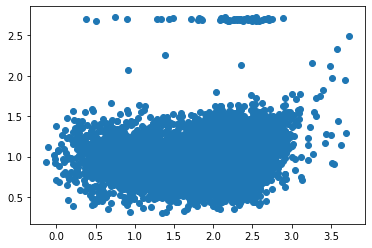

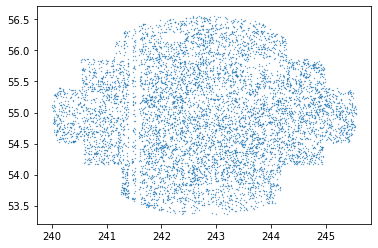

In [206]:
x = np.log10(new_fir_table['F_MIPS_24'])
y = np.log10(new_fir_table['F_PACS_100'])
plt.scatter(x,y)
plt.show()

x = new_fir_table['RA_1']
y = new_fir_table['Dec_1']
plt.scatter(x,y,s=0.1)

In [226]:
#Table.write(fir_table,'data/data_release/XID+_lofar_ELAIS-N1_v0.5_20200113.fits')
from astropy.io import registry
from astropy.table.info import serialize_method_as

with serialize_method_as(new_fir_table, None):
            registry.write(new_fir_table, 'data/data_release/XID+_lofar_ELAIS-N1_v0.5_20200113.fits',format='fits',overwrite=True)

In [157]:
mask = ~np.isnan(fir_table['F_MIPS_24'])
fir_table[mask]['F_MIPS_24'].mask

array([False, False, False, ..., False, False,  True])

In [ ]:
for name in fir_table.colnames:

    if 'Source' in name:
        continue
    if 'rerun' in name:
        continue
    mask = np.isnan(lofar_fir[name+'_1'])
    lofar_fir[name+'_1'][mask] = lofar_fir[name+'_2'][mask]
    lofar_fir.remove_column(name+'_2')

for name in lofar_fir.colnames:
    if name[-2:]=='_1':
        lofar_fir.rename_column(name,name.replace('_1',''))
    if name[-2:]=='_2':
        lofar_fir.rename_column(name,name.replace('_2',''))

In [ ]:
test = 'adadadtt'
test[-2:]

In [ ]:
Table.write(lofar_new_ids,'data/data_release/XID+_lofar_ELAIS-N1.fits',overwrite=True)

### Running checks on the FIR fluxes to see how they compare with the crossmatched fluxes already in the LOFAR catalogue

In [ ]:
lofar_cat = Table.read('data/data_release/final_cross_match_catalogue-v0.1.fits')

In [ ]:
lofar_cat[0]

In [ ]:
lofar_xid_join = join(lofar_cat,data_rerun_table,join_type='outer',keys='Source_Name')
lofar_xid_join['XID+_rerun'] = ~lofar_xid_join['XID+_rerun'].mask

In [ ]:
lofar_xid_join[:5]

In [ ]:
bins = np.arange(0,1,0.01)
dat = lofar_cat['Pval_res_250']
plt.hist(dat,bins=bins,log=True,color='blue')

dat = data_rerun_table['Pval_res_250']
plt.hist(dat,bins=bins,log=True,color='red',alpha=0.4)

plt.show()

dat = lofar_cat['Pval_res_350']
plt.hist(dat,bins=bins,log=True,color='blue')

dat = data_rerun_table['Pval_res_350']
plt.hist(dat,bins=bins,log=True,color='red',alpha=0.4)

plt.show()

dat = lofar_cat['Pval_res_500']
plt.hist(dat,bins=bins,log=True,color='blue')

dat = data_rerun_table['Pval_res_500']
plt.hist(dat,bins=bins,log=True,color='red',alpha=0.4)

plt.show()

In [ ]:
mask = ~np.isnan(lofar_cat['F_SPIRE_250'])
bins = np.arange(-5,-1,0.05)
dat = np.log10(lofar_cat['Peak_flux'][mask])
plt.hist(dat,bins=bins,log=True,color='blue')

dat = np.log10(lofar_cat['Peak_flux'][~mask])
plt.hist(dat,bins=bins,log=True,color='red')
plt.show()

In [ ]:
mask = ~np.isnan(lofar_cat['F_SPIRE_250'])
bins = np.arange(-5,5,0.05)
dat = np.log10(lofar_cat['ch1_swire_flux'][mask])
plt.hist(dat,bins=bins,log=True,color='blue')

dat = np.log10(lofar_cat['ch1_swire_flux'][~mask])
plt.hist(dat,bins=bins,log=True,color='red',alpha=0.4)
plt.show()

In [ ]:
bins = np.arange(0,6000,100)
dat = data_rerun_table['n_eff_SPIRE_250']
plt.hist(dat,bins=bins,log=True)
plt.vlines(40,0,1000)
plt.show()

In [ ]:
bins = np.arange(0.5,1.5,0.01)
dat = data_rerun_table['Rhat_SPIRE_250']
plt.hist(dat,bins=bins,log=True)
plt.vlines(1.2,0,1000)
plt.show()

In [ ]:
len(lofar_xid_join)

In [ ]:
mask = lofar_xid_join['XID+_rerun']
bins = np.arange(0,5,0.1)

#plt.hist(dat,bins=bins,log=True,color='blue')
dist = cosmo.luminosity_distance(dat).to(u.m).value
rad = np.log10(lofar_xid_join['Total_flux'][~mask])
fir = np.log10(lofar_xid_join['F_SPIRE_250_1'][~mask])
y = rad-fir
print(len(y))
plt.scatter(rad,y,s=1,c='red')


#plt.hist(dat,bins=bins,log=True,color='red',alpha=0.4)
rad = np.log10(lofar_xid_join['Total_flux'][mask])
fir = np.log10(lofar_xid_join['F_SPIRE_250_1'][mask])
y = rad-fir
print(len(y))
plt.scatter(rad,y,s=1,c='blue')
plt.show()

In [ ]:
mask = ~lofar_xid_join['XID+_rerun']
x = np.log10(lofar_xid_join['Total_flux'][mask])
y = np.log10(lofar_xid_join['F_MIPS_24'][mask]/lofar_xid_join['F_SPIRE_250_1'][mask])
plt.scatter(x,y,s=1)
plt.show()

In [ ]:
mask = ~lofar_xid_join['XID+_rerun']
x = lofar_xid_join['Maj'][mask]/lofar_xid_join['Min'][mask]
print(len(x))
y = np.log10(lofar_xid_join['Total_flux'][mask]/lofar_xid_join['F_SPIRE_250_1'][mask])
plt.scatter(x,y,s=1)

mask = lofar_xid_join['XID+_rerun']
x = lofar_xid_join['Maj'][mask]/lofar_xid_join['Min'][mask]
print(len(x))
y = np.log10(lofar_xid_join['Total_flux'][mask]/lofar_xid_join['F_SPIRE_250_2'][mask])
plt.scatter(x,y,s=1,c='red')

plt.xlim(1,3)
plt.xlabel('major_axis/minor_axis')
plt.ylabel('radio-250')
plt.show()

mask = ~lofar_xid_join['XID+_rerun']
x = lofar_xid_join['Total_flux'][mask]/lofar_xid_join['Peak_flux'][mask]
y = np.log10(lofar_xid_join['Total_flux'][mask]/lofar_xid_join['F_SPIRE_250_1'][mask])
plt.scatter(x,y,s=1)

mask = lofar_xid_join['XID+_rerun']
x = lofar_xid_join['Total_flux'][mask]/lofar_xid_join['Peak_flux'][mask]
y = np.log10(lofar_xid_join['Total_flux'][mask]/lofar_xid_join['F_SPIRE_250_2'][mask])
plt.scatter(x,y,s=1)

plt.xlim(1,3)
plt.xlabel('total_flux/peak_flux')
plt.ylabel('radio-250')
plt.show()

In [ ]:
mask = ~np.isnan(lofar_cat['F_SPIRE_250']) #& (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
c1 = np.log10(lofar_cat['ch3_swire_flux'][mask]/lofar_cat['ch1_swire_flux'][mask])
c2 = np.log10(lofar_cat['ch4_swire_flux'][mask]/lofar_cat['ch2_swire_flux'][mask])
plt.scatter(c1,c2,s=1)

mask = np.isnan(lofar_cat['F_SPIRE_250']) #& (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
c1 = np.log10(lofar_cat['ch3_swire_flux'][mask]/lofar_cat['ch1_swire_flux'][mask])
c2 = np.log10(lofar_cat['ch4_swire_flux'][mask]/lofar_cat['ch2_swire_flux'][mask])
z_col = lofar_cat['z1_median'][mask]
z_bins = np.arange(0,4,0.5)
z_binned = np.digitize(z_col,z_bins)
#plt.scatter(c1[0],c2[0],s=100,c='red')
plt.scatter(c1,c2,s=1)
#plt.scatter(c1[0],c2[0],s=10,c='red')
#plt.scatter(c1[0],c2[0],s=1,c=z_binned[0])


plt.xlim(-1,2)
plt.ylim(-1,2)
plt.xlabel('irac3-irac1')
plt.ylabel('irac4-irca2')
#plt.title('{} < z < {}'.format(z_bins[n],z_bins[n+1]))
plt.show()

In [ ]:
z_bins = np.arange(0,4,0.5)
dist = cosmo.luminosity_distance(lofar_cat['z1_median']).to(u.m).value
ch1_lum = lofar_cat['ch1_swire_flux']*4*np.pi*dist**2
ch2_lum = lofar_cat['ch2_swire_flux']*4*np.pi*dist**2
ch3_lum = lofar_cat['ch3_swire_flux']*4*np.pi*dist**2
ch4_lum = lofar_cat['ch4_swire_flux']*4*np.pi*dist**2
for n in range(len(z_bins)-1):
    mask = ~np.isnan(lofar_cat['F_SPIRE_250']) & (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
    c1 = np.log10(lofar_cat['ch3_swire_flux'][mask]/lofar_cat['ch1_swire_flux'][mask])
    c2 = np.log10(lofar_cat['ch4_swire_flux'][mask]/lofar_cat['ch2_swire_flux'][mask])
    plt.scatter(c1,c2,s=1)

    mask = np.isnan(lofar_cat['F_SPIRE_250']) & (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
    c1 = np.log10(lofar_cat['ch3_swire_flux'][mask]/lofar_cat['ch1_swire_flux'][mask])
    c2 = np.log10(lofar_cat['ch4_swire_flux'][mask]/lofar_cat['ch2_swire_flux'][mask])
    z_col = lofar_cat['z1_median'][mask]
    z_bins = np.arange(0,4,0.5)
    z_binned = np.digitize(z_col,z_bins)
#plt.scatter(c1[0],c2[0],s=100,c='red')
    plt.scatter(c1,c2,s=1)
#plt.scatter(c1[0],c2[0],s=10,c='red')
#plt.scatter(c1[0],c2[0],s=1,c=z_binned[0])


    plt.xlim(-1,2)
    plt.ylim(-1,2)
    plt.xlabel('irac3-irac1')
    plt.ylabel('irac4-irca2')
    plt.title('{} < z < {}'.format(z_bins[n],z_bins[n+1]))
    plt.show()

In [ ]:
z_bins = np.arange(0,4,0.5)
dist = cosmo.luminosity_distance(lofar_cat['z1_median']).to(u.m).value
ch1_lum = lofar_cat['ch1_swire_flux']*4*np.pi*dist**2
ch2_lum = lofar_cat['ch2_swire_flux']*4*np.pi*dist**2
ch3_lum = lofar_cat['ch3_swire_flux']*4*np.pi*dist**2
ch4_lum = lofar_cat['ch4_swire_flux']*4*np.pi*dist**2
for n in range(len(z_bins)-1):
    mask = ~np.isnan(lofar_cat['F_SPIRE_250']) & (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
    c1 = np.log10(ch3_lum[mask]/ch1_lum[mask])
    c2 = np.log10(ch4_lum[mask]/ch2_lum[mask])
    plt.scatter(c1,c2,s=1)

    mask = np.isnan(lofar_cat['F_SPIRE_250']) & (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
    c1 = np.log10(ch3_lum[mask]/ch1_lum[mask])
    c2 = np.log10(ch4_lum[mask]/ch2_lum[mask])
    z_col = lofar_cat['z1_median'][mask]
    z_bins = np.arange(0,4,0.5)
    z_binned = np.digitize(z_col,z_bins)
#plt.scatter(c1[0],c2[0],s=100,c='red')
    plt.scatter(c1,c2,s=1)
#plt.scatter(c1[0],c2[0],s=10,c='red')
#plt.scatter(c1[0],c2[0],s=1,c=z_binned[0])


    plt.xlim(-1,2)
    plt.ylim(-1,2)
    plt.xlabel('irac3-irac1')
    plt.ylabel('irac4-irca2')
    plt.title('{} < z < {}'.format(z_bins[n],z_bins[n+1]))
    plt.show()